# **Qatar Airways Recommendation System**

Importing all required Libraries

In [612]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import ptitprince as pt

In [613]:
# Reading dataset.
df = pd.read_csv("qatar_airways_reviews.csv")

In [614]:
# Viewing top 2 records
df.head(2)

,Unnamed: 0,Date Published,Rating,Max Rating,Title,Author,Country,Date,Review Body,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft,Verified
0,0,2024-03-02,1.0,10.0,“marred by inconveniences”,Mary Le,United Kingdom,2024-03-02,The delay of my flight from Haneda to Doha ca...,Solo Leisure,Economy Class,Tokyo to London Heathrow via Doha,March 2024,no,NaN,0.0
1,1,2024-02-29,1.0,10.0,"""seat wouldn't stay up""",Brian English,Canada,2024-02-29,They convinced me that I needed to pay $1500...,Couple Leisure,Business Class,Doha to Montreal,February 2024,no,NaN,1.0


In [615]:
# Dropping unnecessary column.
df.drop("Unnamed: 0",axis =1, inplace = True)

In [616]:
# Screening details of table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2369 entries, 0 to 2368
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date Published     2369 non-null   object 
 1   Rating             2368 non-null   float64
 2   Max Rating         2368 non-null   float64
 3   Title              2369 non-null   object 
 4   Author             2369 non-null   object 
 5   Country            2369 non-null   object 
 6   Date               2369 non-null   object 
 7   Review Body        2369 non-null   object 
 8   Type Of Traveller  1934 non-null   object 
 9   Seat Type          2369 non-null   object 
 10  Route              1931 non-null   object 
 11  Date Flown         1925 non-null   object 
 12  Recommended        588 non-null    object 
 13  Aircraft           1281 non-null   object 
 14  Verified           1252 non-null   float64
dtypes: float64(3), object(12)
memory usage: 277.7+ KB


The `df.describe()` function provides descriptive statistics about the numerical columns in a DataFrame. It gives summary of central tendency, dispersion, and shape of the dataset's distribution. Here's what each part of the output typically represents:

- **count**: Number of non-null observations.
- **mean**: Mean or average value.
- **std**: Standard deviation, which measures the dispersion of values.
- **min**: Minimum value.
- **25%**: 25th percentile, also known as the first quartile.
- **50%**: 50th percentile, also known as the median or second quartile.
- **75%**: 75th percentile, also known as the third quartile.
- **max**: Maximum value.

This summary helps understand the distribution of numerical data in your DataFrame, identify outliers, and detect potential issues with your dataset.

In [617]:
# Describing numerical values.
df.describe()

,Rating,Max Rating,Verified
count,2368.000000,2368.0,1252.000000
mean,7.311233,10.0,0.920128
std,2.861367,0.0,0.271204
min,1.000000,10.0,0.000000
25%,5.000000,10.0,1.000000
50%,8.000000,10.0,1.000000
75%,10.000000,10.0,1.000000
max,10.000000,10.0,1.000000


In [618]:
df.head()

,Date Published,Rating,Max Rating,Title,Author,Country,Date,Review Body,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft,Verified
0,2024-03-02,1.0,10.0,“marred by inconveniences”,Mary Le,United Kingdom,2024-03-02,The delay of my flight from Haneda to Doha ca...,Solo Leisure,Economy Class,Tokyo to London Heathrow via Doha,March 2024,no,NaN,0.0
1,2024-02-29,1.0,10.0,"""seat wouldn't stay up""",Brian English,Canada,2024-02-29,They convinced me that I needed to pay $1500...,Couple Leisure,Business Class,Doha to Montreal,February 2024,no,NaN,1.0
2,2024-02-29,1.0,10.0,"""no attempt to address our complaint""",Wayne Burgess,Australia,2024-02-29,I have sent 5 emails and have only received ...,Business,Economy Class,Doha to Perth,November 2023,no,A380,1.0
3,2024-02-25,10.0,10.0,“I hope they update the A380”,Alwaleed Althani,Qatar,2024-02-25,We flew on probably the first A380 the airlin...,Couple Leisure,First Class,Doha to London Heathrow,February 2024,NaN,A380-800,1.0
4,2024-02-22,7.0,10.0,"""I’d rate them maybe 7/10""",W Warnock,United Kingdom,2024-02-22,"Service was ok, pretty good on my aisle and ...",Couple Leisure,Business Class,Auckland to Doha,February 2024,no,A350,1.0


From above table we can see two columns named `Date Published` and `Date`, hence we need to identify whether both have same data or not, Conforming whether `Date Published` & `Date` column has same values or not, if they are same then we can remove any one column as it developes redundancy  

In [619]:
(df['Date Published'] == df['Date']).value_counts()

True    2369
dtype: int64

Above code confimr that both columns have same data.

from above code we can remove `Date` column from the table.

In [620]:
df.drop('Date', axis = 1, inplace = True)

In [621]:
# Viewing random 5 records.
df.sample(5)

,Date Published,Rating,Max Rating,Title,Author,Country,Review Body,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft,Verified
2189,2014-05-18,7.0,10.0,Qatar Airways customer review,U Colombo,South Africa,CPT-DOH-MXP-DOH-CPT. Big surprise was QR122 MX...,NaN,Economy Class,NaN,NaN,NaN,NaN,NaN
295,2022-10-16,1.0,10.0,"""failed to make the refund""",John Squire,United Kingdom,Qatar Airways have promised me a refund but ...,Couple Leisure,Business Class,Dublin to Bangkok via Doha,November 2021,no,NaN,1.0
1547,2016-09-04,10.0,10.0,"""best comfort, food, and service""",Robyn Gilbertson,Australia,Adelaide to Barcelona via Doha. Qatar Airways ...,Couple Leisure,Business Class,ADL to BCN via DOH,August 2016,NaN,A350 / A330,NaN
2214,2014-04-13,2.0,10.0,Qatar Airways customer review,Natalia Radcliffe,United Kingdom,The outbound leg from LHR T4 to Doha was on a ...,NaN,Economy Class,NaN,NaN,no,NaN,NaN
203,2023-03-17,10.0,10.0,"""wonderful inflight experience""",Tuhendu Das,India,Thank you for the wonderful inflight experie...,Family Leisure,Economy Class,Zagreb to Dubai via Doha,March 2023,NaN,NaN,1.0


In [622]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2369 entries, 0 to 2368
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date Published     2369 non-null   object 
 1   Rating             2368 non-null   float64
 2   Max Rating         2368 non-null   float64
 3   Title              2369 non-null   object 
 4   Author             2369 non-null   object 
 5   Country            2369 non-null   object 
 6   Review Body        2369 non-null   object 
 7   Type Of Traveller  1934 non-null   object 
 8   Seat Type          2369 non-null   object 
 9   Route              1931 non-null   object 
 10  Date Flown         1925 non-null   object 
 11  Recommended        588 non-null    object 
 12  Aircraft           1281 non-null   object 
 13  Verified           1252 non-null   float64
dtypes: float64(3), object(11)
memory usage: 259.2+ KB


Checking for any duplicate values

In [623]:
df.duplicated().any()

True

In [624]:
# Displaying duplicated record
df[df.duplicated()]

,Date Published,Rating,Max Rating,Title,Author,Country,Review Body,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft,Verified
2104,2014-10-13,4.0,10.0,Qatar Airways customer review,Geoff Harris,United Kingdom,Qatar Airways has really gone downhill at leas...,NaN,Economy Class,NaN,NaN,no,NaN,NaN


Dropping duplicated, keeping the `first record` as true value.

In [625]:
df.drop_duplicates(keep='first', inplace=True)

Verfying the above code

In [626]:
df.duplicated().any()

False

In [627]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2368 entries, 0 to 2368
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date Published     2368 non-null   object 
 1   Rating             2367 non-null   float64
 2   Max Rating         2367 non-null   float64
 3   Title              2368 non-null   object 
 4   Author             2368 non-null   object 
 5   Country            2368 non-null   object 
 6   Review Body        2368 non-null   object 
 7   Type Of Traveller  1934 non-null   object 
 8   Seat Type          2368 non-null   object 
 9   Route              1931 non-null   object 
 10  Date Flown         1925 non-null   object 
 11  Recommended        587 non-null    object 
 12  Aircraft           1281 non-null   object 
 13  Verified           1252 non-null   float64
dtypes: float64(3), object(11)
memory usage: 277.5+ KB


Checking for `NULL Values`

In [628]:
df.isna().sum()

Date Published          0
Rating                  1
Max Rating              1
Title                   0
Author                  0
Country                 0
Review Body             0
Type Of Traveller     434
Seat Type               0
Route                 437
Date Flown            443
Recommended          1781
Aircraft             1087
Verified             1116
dtype: int64

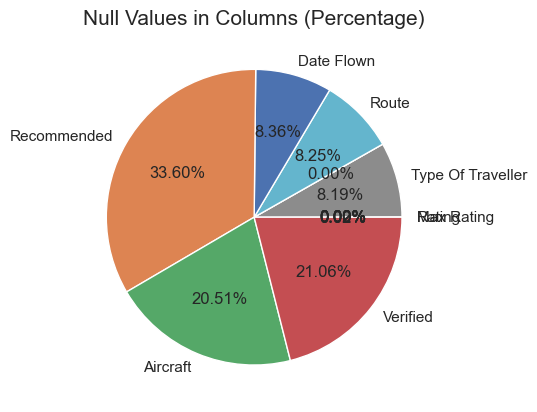

In [629]:
df.isna().sum().plot(kind='pie', autopct='%.2f%%')
plt.title("Null Values in Columns (Percentage)", fontsize=15)
plt.show()

Finding null values in `Rating` column

In [630]:
df[df['Rating'].isna()]

,Date Published,Rating,Max Rating,Title,Author,Country,Review Body,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft,Verified
1308,2017-09-16,NaN,NaN,"""fabulous service from Qatar Airways""",R Kirchner,United Kingdom,✅ Verified Review | Munich to Doha onboard a ...,Solo Leisure,Economy Class,Munich to Doha,September 2017,NaN,A350,NaN


As we can't replace any value in `Rating` and `Max Rating` column for above record, since we don't have any feature to predict, we;ll remove that record from database.

In [631]:
df.dropna(subset=['Rating'], inplace = True)

In [632]:
df.isna().sum().sort_values()

Date Published          0
Rating                  0
Max Rating              0
Title                   0
Author                  0
Country                 0
Review Body             0
Seat Type               0
Type Of Traveller     434
Route                 437
Date Flown            443
Aircraft             1087
Verified             1115
Recommended          1780
dtype: int64

## **Cleaning**

### **1. Type of Traveller**

In [633]:
# Finding types of categories in 'Type of Traveller' column to segregate
df['Type Of Traveller'].value_counts()

Solo Leisure      841
Couple Leisure    458
Business          325
Family Leisure    309
Name: Type Of Traveller, dtype: int64

In [634]:
# Finding Non-Null values in the column
df['Type Of Traveller'].notna().sum()

1933

In [635]:
# Finding Null values in column 
df['Type Of Traveller'].isna().sum()

434

In [636]:
# Adding null values and not null values to get total count matching total rows in data.
(df['Type Of Traveller'].notna().sum()) + (df['Type Of Traveller'].isna().sum())

2367

We've total `434` values missing which needs to be imputed.

`Since we didn't have any dependent column/data to find and fill missing values with some sensible/relatable data, we will need to impute that data with `Unknown` value. `

In [637]:
# Filling null values with 'Unknown' Vlaues in 'Type of Traveller' column
df['Type Of Traveller'].fillna("Unknown", inplace = True)

In [638]:
# Verifying above changes done.
df.isna().sum().sort_values()

Date Published          0
Rating                  0
Max Rating              0
Title                   0
Author                  0
Country                 0
Review Body             0
Type Of Traveller       0
Seat Type               0
Route                 437
Date Flown            443
Aircraft             1087
Verified             1115
Recommended          1780
dtype: int64

### **2. Date Flown**

Since we've dates already mentioned in `Published column` hence we fetch dates from there to `Date Flown` column. 

Checking for data type of `Date Published` and `Date Flown`.

In [639]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2367 entries, 0 to 2368
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date Published     2367 non-null   object 
 1   Rating             2367 non-null   float64
 2   Max Rating         2367 non-null   float64
 3   Title              2367 non-null   object 
 4   Author             2367 non-null   object 
 5   Country            2367 non-null   object 
 6   Review Body        2367 non-null   object 
 7   Type Of Traveller  2367 non-null   object 
 8   Seat Type          2367 non-null   object 
 9   Route              1930 non-null   object 
 10  Date Flown         1924 non-null   object 
 11  Recommended        587 non-null    object 
 12  Aircraft           1280 non-null   object 
 13  Verified           1252 non-null   float64
dtypes: float64(3), object(11)
memory usage: 277.4+ KB


Both beign `OBJECT` type, we need to convert `Date Published` column to Datetime format from object type, and then for `Date Flown`

In [640]:
# Changing DataType of `dateTime` column from `Object` to `DateTime[ns]`
df['Date Published'] = pd.to_datetime(df['Date Published'])

In [641]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2367 entries, 0 to 2368
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date Published     2367 non-null   datetime64[ns]
 1   Rating             2367 non-null   float64       
 2   Max Rating         2367 non-null   float64       
 3   Title              2367 non-null   object        
 4   Author             2367 non-null   object        
 5   Country            2367 non-null   object        
 6   Review Body        2367 non-null   object        
 7   Type Of Traveller  2367 non-null   object        
 8   Seat Type          2367 non-null   object        
 9   Route              1930 non-null   object        
 10  Date Flown         1924 non-null   object        
 11  Recommended        587 non-null    object        
 12  Aircraft           1280 non-null   object        
 13  Verified           1252 non-null   float64       
dtypes: datet

Using `fillna` to impute values in `Date Flown` from `Date Published` in `Month Year` format

In [642]:
# Converting the datetime format and filling null values with specified format from 'Date Published' column.

df['Date Flown'] = pd.to_datetime(df['Date Flown'], format='%B %Y', errors='coerce')
df['Date Flown'] = df['Date Flown'].fillna(df['Date Published'].dt.strftime('%B %Y'))

In [643]:
df.sample(4)

,Date Published,Rating,Max Rating,Title,Author,Country,Review Body,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft,Verified
443,2022-04-12,1.0,10.0,"""Both my flights to and from were delayed""",C Horton,United States,Overall experience was very disappointing. B...,Family Leisure,Economy Class,Seattle to Dubai via Doha,2022-03-01,no,NaN,1.0
141,2023-07-13,2.0,10.0,"""The seat was uncomfortable""",S Haseet,India,The check-in was smooth and the crew was ple...,Solo Leisure,Economy Class,Mumbai to Chicago via Doha,2023-07-01,no,Boeing 777-300,1.0
548,2021-08-21,9.0,10.0,"""very comfortable and good hospitality""",J Bindaur,Nepal,Kathmandu to Philadelphia via Doha. Marvelou...,Family Leisure,Economy Class,Kathmandu to Philadelphia via Doha,2021-08-01,NaN,NaN,1.0
1995,2015-03-09,8.0,10.0,Qatar Airways customer review,W Charlotte,Sweden,CPH-DOH-DXB round-trip. CPH-DOH with Boeing 78...,Unknown,Economy Class,NaN,2015-03-01,NaN,NaN,NaN


Converting Date Flown to `Month Year` format from Normal Date format

In [644]:
# COnverting normal date format to ' Month Year' date format.
df['Date Flown'] = df['Date Flown'].dt.strftime('%B %Y')

### **3. Verified**

In [645]:
df.isna().sum()

Date Published          0
Rating                  0
Max Rating              0
Title                   0
Author                  0
Country                 0
Review Body             0
Type Of Traveller       0
Seat Type               0
Route                 437
Date Flown              0
Recommended          1780
Aircraft             1087
Verified             1115
dtype: int64

In [646]:
# Unique categories in column
df['Verified'].unique()

array([ 0.,  1., nan])

In [647]:
# Searching and selecting those rows which has 'Verified Review' in 'Review Body' so that can be mapped for further analysis. 
verified_reviews = df[df['Review Body'].str.contains('Verified Review', case=False)].copy()

In [648]:
# Below are all the Travellers whose review is verified and van be used to replace/impute null values in 'Verified' column to fill as `1.0`.
verified_reviews

,Date Published,Rating,Max Rating,Title,Author,Country,Review Body,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft,Verified
1255,2017-11-18,10.0,10.0,"""Great service in the cabin""",G Stanton,Hong Kong,✅ Verified Review | Kiev to Doha. Plane took ...,Solo Leisure,Economy Class,Kiev to Doha,November 2017,NaN,A320,NaN
1256,2017-11-18,10.0,10.0,"""100% happy with what they offered""",Anton Gots,Hong Kong,✅ Verified Review | Flew Doha to Hong Kong. F...,Solo Leisure,Economy Class,Doha to Hong Kong,November 2017,NaN,Boeing 787,NaN
1257,2017-11-17,10.0,10.0,"""Crew are wonderful""",D Anderson,Qatar,✅ Verified Review | Flew Paris CDG to Doha. T...,Business,Business Class,Paris to Doha,November 2017,NaN,A350-900,NaN
1258,2017-11-17,6.0,10.0,"""flight was good although food not""",G Litten,Australia,✅ Verified Review | Sydney to Amsterdam via D...,Couple Leisure,Business Class,Sydney to Amsterdam via Doha,November 2017,no,A380,NaN
1259,2017-11-12,6.0,10.0,"""Service out of CPH was rushed""",D Webb,United Kingdom,✅ Verified Review | Copenhagen to Male via Do...,Couple Leisure,Business Class,Copenhagen to Male via Doha,November 2017,NaN,Boeing 787 / A350,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661,2016-03-31,5.0,10.0,"""all flights on time""",C Stanhope,United Kingdom,✅ Verified Review | London to Colombo via Doh...,Couple Leisure,Economy Class,LHR to CNB via DOH,March 2016,no,Boeing 777 / 787 / A340,NaN
1662,2016-03-30,10.0,10.0,"""experience was excellent""",C Kay,United Kingdom,✅ Verified Review | Edinburgh to Male via Doh...,Couple Leisure,Business Class,EDI to MLE via DOH,March 2016,NaN,Boeing 787 / A330 / A320,NaN
1664,2016-03-28,10.0,10.0,"""very polite, friendly and smiling""",M Mawanga,United Kingdom,✅ Verified Review | London Heathrow to Cape T...,Solo Leisure,Economy Class,LHR to CPT via DOH,February 2016,NaN,NaN,NaN
1665,2016-03-26,10.0,10.0,"""fantastic business class experience""",A Ahmed,United Kingdom,✅ Verified Review | Copenhagen to Melbourne v...,Solo Leisure,Business Class,CPH to MEL via DOH,February 2016,NaN,Boeing 787-8 / 777-300ER,NaN


In [649]:
df.isna().sum()

Date Published          0
Rating                  0
Max Rating              0
Title                   0
Author                  0
Country                 0
Review Body             0
Type Of Traveller       0
Seat Type               0
Route                 437
Date Flown              0
Recommended          1780
Aircraft             1087
Verified             1115
dtype: int64

Here from above codes we've 368 rows as NaN which can be imputed with `1.0` making it as `Verified` review, and others as `0` making it Unverified review.

In [650]:
# Converting data to .csv format for easy view.
verified_reviews = verified_reviews.to_csv("verified_reviews.csv")

## ***Savepoint 1***

In [651]:
# Reading .csv file of Verified reviews
verified_reviews = pd.read_csv("verified_reviews.csv")

In [652]:
verified_reviews['Verified'].isna().sum()

368

In [653]:
# Checking for % of each category
df['Verified'].value_counts(normalize = True)*100

1.0    92.01278
0.0     7.98722
Name: Verified, dtype: float64

We've total 92% of reviews Verified.

In [654]:
# Null values in 'Verified' column
df['Verified'].isna().sum()

1115

Imputing values in column `Verified Review` using `.loc` method 

In [655]:
verified_rows = df[df['Review Body'].str.contains('Verified Review', case=False)]

# mapping verified_rows tin main dataset 'df' and filling null values with '1.0' as Verified.
df.loc[verified_rows.index, 'Verified'] = df.loc[verified_rows.index, 'Verified'].fillna(1.0)

In [656]:
# Remaining null values after imputation of '1.0' in dataset.
df['Verified'].isna().sum()

747

In [657]:
# Checking for any null values for condition in 'Verified Review' in data
df[df['Review Body'].str.contains('Verified Review', case=False)].isna().sum()

Date Published         0
Rating                 0
Max Rating             0
Title                  0
Author                 0
Country                0
Review Body            0
Type Of Traveller      0
Seat Type              0
Route                  0
Date Flown             0
Recommended          286
Aircraft              79
Verified               0
dtype: int64

Hence from above code we can confirm that we've imputed values successfully into 'Verified' column as tyhere are no null values inplace of 'Verified Review' being the comment in 'Review Body'.

In [658]:
# Cehcking for null values after imputation of verified rows
df['Verified'].isna().sum()

747

In [659]:
# mapping rows inverted to above imputations.
not_verified_reviews = df[~df['Review Body'].str.contains('Verified Review', case=False)].copy()

In [660]:
# Confirming the number of rows to be imputed as 0.0
not_verified_reviews['Verified'].isna().sum()

747

`Imputing rest other NaN values with 0.0`, as further there is no other dependent column from where we can consider whether it is Verified or not, hence...

In [661]:
not_verified_reviews = df[~df['Review Body'].str.contains('Verified Review', case=False)]

df.loc[not_verified_reviews.index, 'Verified'] = df.loc[not_verified_reviews.index, 'Verified'].fillna(0.0)

In [662]:
# Confirming imputation of above codes.
df.isna().sum()

Date Published          0
Rating                  0
Max Rating              0
Title                   0
Author                  0
Country                 0
Review Body             0
Type Of Traveller       0
Seat Type               0
Route                 437
Date Flown              0
Recommended          1780
Aircraft             1087
Verified                0
dtype: int64

### **4. Recommended**

In [663]:
df.isna().sum()

Date Published          0
Rating                  0
Max Rating              0
Title                   0
Author                  0
Country                 0
Review Body             0
Type Of Traveller       0
Seat Type               0
Route                 437
Date Flown              0
Recommended          1780
Aircraft             1087
Verified                0
dtype: int64

Need to find how many travellers have `recommended` as `no`.

In [664]:
df['Recommended'].value_counts()

no    587
Name: Recommended, dtype: int64

In [665]:
df['Recommended'].isna().sum()

1780

In [666]:
# Adding NULL values and not-null values to get total count of rows.
total = (df['Recommended'].value_counts() + df['Recommended'].isna().sum())
total

no    2367
Name: Recommended, dtype: int64

Since we have major values as `NULL`, we have rating column which can be used as paramter to consider recommendation as `Yes` or `No`, hence we group by and find out ratings provided by travellers. 

In [667]:
# Total number of Travellers by ratings given. 
df['Rating'].value_counts()

10.0    726
9.0     412
8.0     279
7.0     212
5.0     154
1.0     152
6.0     134
3.0     109
4.0      97
2.0      92
Name: Rating, dtype: int64

In [668]:
# Grouping by Rating and recommendation for understanding distribution
df.groupby(['Rating'])['Recommended'].value_counts()

Rating  Recommended
1.0     no             151
2.0     no              87
3.0     no              96
4.0     no              82
5.0     no              92
6.0     no              52
7.0     no              22
8.0     no               1
9.0     no               3
10.0    no               1
Name: Recommended, dtype: int64

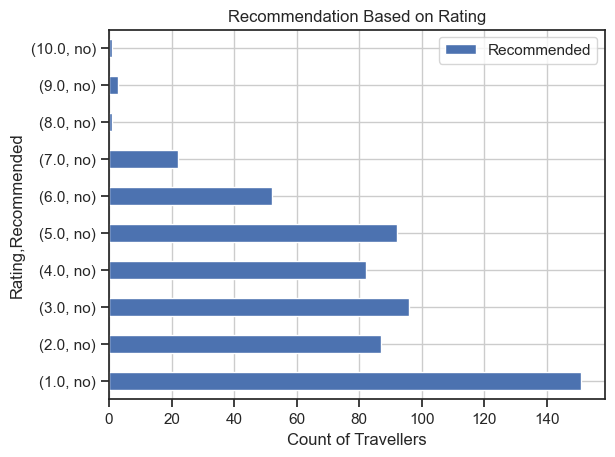

In [669]:
# Grouping by Rating and recommendation for understanding distribution
df.groupby(['Rating'])['Recommended'].value_counts().plot(kind='barh', grid = True, legend=True)
plt.title("Recommendation Based on Rating")
plt.xlabel("Count of Travellers")
plt.show()

From above plot we can assume that Travellers who are rating airline as or above 8.0 out of 10.0 have very less probability of not recommending.

From above code, we justify that `any rating under 8.0 shall be considered as Not recommended and above 8.0 as Recommended`. 

In [670]:
rating_mask = df['Rating'] < 8

df.loc[rating_mask, 'Recommended'] = df.loc[rating_mask, 'Recommended'].fillna('no')
df.loc[~rating_mask, 'Recommended'] = df.loc[~rating_mask, 'Recommended'].fillna('Yes')

In [671]:
# Grouping ratings, recommendations and counts of travellers on each points.
grouped = df.groupby(['Rating'])['Recommended'].value_counts()

In [672]:
print(grouped)

Rating  Recommended
1.0     no             152
2.0     no              92
3.0     no             109
4.0     no              97
5.0     no             154
6.0     no             134
7.0     no             212
8.0     Yes            278
        no               1
9.0     Yes            409
        no               3
10.0    Yes            725
        no               1
Name: Recommended, dtype: int64


In [673]:
# Recommendation Percentage by Travellers
df['Recommended'].value_counts(normalize=True)*100

Yes    59.65357
no     40.34643
Name: Recommended, dtype: float64

In [674]:
df.isna().sum()

Date Published          0
Rating                  0
Max Rating              0
Title                   0
Author                  0
Country                 0
Review Body             0
Type Of Traveller       0
Seat Type               0
Route                 437
Date Flown              0
Recommended             0
Aircraft             1087
Verified                0
dtype: int64

### **5. Route**

In [675]:
# Displaying data with `Route` column being empty/NULL
df[df['Route'].isna()]

,Date Published,Rating,Max Rating,Title,Author,Country,Review Body,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft,Verified
836,2019-09-28,1.0,10.0,"""Bitterly disappointed""",C Johnson,United Kingdom,Kuwait to Manchester via Doha. Bitterly disap...,Business,First Class,NaN,September 2019,no,Boeing 777,1.0
1823,2015-10-01,9.0,10.0,"""cabin crew friendly and obliging""",Mike Cameron,United Kingdom,"We flew London to Dubai through Doha, using Qa...",Couple Leisure,Economy Class,NaN,September 2015,Yes,Boeing 777,0.0
1933,2015-06-13,9.0,10.0,Qatar Airways customer review,B Johnson,South Africa,For someone who has become used to the standar...,Business,Business Class,NaN,June 2015,Yes,NaN,0.0
1934,2015-06-07,7.0,10.0,Qatar Airways customer review,W Woon,Singapore,4 flight sectors altogether: SIN-DOH-LHR on 5 ...,Unknown,Economy Class,NaN,June 2015,no,NaN,0.0
1935,2015-06-06,10.0,10.0,Qatar Airways customer review,Graham Williams,United Kingdom,I flew to Thailand for my honeymoon with Qatar...,Unknown,Economy Class,NaN,June 2015,Yes,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,2013-08-12,9.0,10.0,Qatar Airways customer review,R Nash,Australia,Flew first class CAI-DOH on QR503 on 8th Aug 2...,Unknown,First Class,NaN,August 2013,Yes,NaN,0.0
2365,2013-08-06,7.0,10.0,Qatar Airways customer review,Gamage Champika,United Arab Emirates,I took a flight to London on 17th July with my...,Unknown,Economy Class,NaN,August 2013,no,NaN,0.0
2366,2013-08-06,5.0,10.0,Qatar Airways customer review,Martin Fernandez,Spain,MAD-DOH-DXB and back. Boeing 777 in MAD-DOH se...,Unknown,Economy Class,NaN,August 2013,no,NaN,0.0
2367,2013-08-06,7.0,10.0,Qatar Airways customer review,David Monteiro,Switzerland,GVA-AUH A320. Good food but after the main mea...,Unknown,Economy Class,NaN,August 2013,no,NaN,0.0


We've total 437 rows to be filled from being missing in `Route` Column

Total 437 rows of route needs to be imputed to get accurate recommendation system

In [678]:
df['Route'].unique()

array(['Tokyo to London Heathrow via Doha', 'Doha to Montreal',
       'Doha to Perth', ..., 'Milan-Doha and Doha-Guangzhou',
       'Singapore-Doha-Johannesburg', 'MEL-DOH-LHR-DOH-MEL'], dtype=object)

In [679]:
df['Route'].value_counts()

Bangkok to Doha                      16
Doha to Bangkok                      13
Doha to London                       13
London to Doha                       12
LHR to BKK via DOH                    9
                                     ..
Milan to Auckland via Doha/Sydney     1
Amman to Bangkok via Doha             1
Lisbon to Doha                        1
Doha to Dallas                        1
MEL-DOH-LHR-DOH-MEL                   1
Name: Route, Length: 1380, dtype: int64

In [680]:
df['Route'].notna().sum()

1930

1. Total records available: <span style="color:yellow">2367</span>.
2. Total filled records: <span style="color:green">1930</span>.
2. Total Null Records: <span style="color:red">437</span> 


In [681]:
df['Route'].isna().sum()

437

We've total 437 null records from 2367, which need to be imputed on later stage, but from `df['Route'].notna().sum()` this code we need to Seperate `Route` column to two different columns i.e.:- 
1. From 
2. To 

Total records which contains `"To"` in text are `1920`, hence this many records can be splitted into two dirrenect column.

In [682]:
# Counting records which contains "to" as keyword in `Route` column
(df['Route'].str.contains("to").sum()) 

1920

In [683]:
# Vice Versa of above code, selecting columns which does nto contains 'To' in column 'Route'
(~(df['Route'].astype(str).str.contains("to"))).sum()

447

From above code we can understand that there are 1920 records which contains `to` word, which could be used to split the Route into two different columns 

In [684]:
# Splitting the 'Route' column into 'From' and 'To' columns
df[['From', 'To']] = df['Route'].str.split(' to ', expand=True)

In [685]:
df.sample(5)

,Date Published,Rating,Max Rating,Title,Author,Country,Review Body,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft,Verified,From,To
1427,2017-03-22,10.0,10.0,"""staff were extremely helpful""",S Thomson,Greece,✅ Verified Review | Flew back home with Qatar...,Business,Economy Class,Dubai to Athens via Doha,March 2017,Yes,A330-300 / A320-200,1.0,Dubai,Athens via Doha
1703,2016-02-06,10.0,10.0,"""unforgettable journey""",Vadat Hasanov,Azerbaijan,Baku to Frankfurt via Doha was very comfortabl...,Solo Leisure,Economy Class,GYD to FRA via DOH,June 2015,Yes,A350-900,0.0,GYD,FRA via DOH
860,2019-08-31,1.0,10.0,"""contact them since for compensation""",B Shameda,United Kingdom,London to Phuket via Doha. Sadly there was a...,Family Leisure,Economy Class,London to Phuket via Doha,July 2019,no,A380,1.0,London,Phuket via Doha
1453,2017-02-19,9.0,10.0,"""the food was excellent""",Koen de Graeve,Belgium,✅ Verified Review | We had a flight from Amst...,Couple Leisure,Business Class,Amsterdam to Bangkok via doha,January 2017,Yes,Boeing 777 / A380,1.0,Amsterdam,Bangkok via doha
978,2019-02-07,10.0,10.0,"""from a very happy customer""",Emad AbuHanna,Australia,Sydney to Amman via Doha. My transit was in ...,Solo Leisure,Economy Class,Sydney to Amman via Doha,February 2019,Yes,Airbus A380-800,1.0,Sydney,Amman via Doha


In [686]:
# Not Null values in 'From' column
df['From'].notna().sum()

1930

From above and below code we have successfully created 2 diff column i.e `From` and `To`with all getting split from `To` Keyword, further from column `To` we'll split new column called `Via`, in which data will be extracted from `To` column. 

In [687]:
# # Not Null values in 'To' column
df['To'].notna().sum()

1920

Now Since there are 1920 column filled in `To` column there are still 10 rows being empty, need to check those.

In [688]:
df[['Author', 'Route']][df['From'].notna() & df['To'].isna()]

,Author,Route
1570,B Nalikov,doh TO sof
1911,Tom Osborne,LHR-DOH-BKK
1913,Denzil Bourne,SIN-LHR via DOH
1914,Denzil Bourne,LHR-SIN via DOH
1921,R Clarke,MEL-DOH-BAH
1927,M LaPrairie,IAD-DOH
1928,B Wijesinghe,IAD-DOH-CMB-DOH-IAD
1930,F Bertoni,Milan-Doha and Doha-Guangzhou
1931,Rob Wood,Singapore-Doha-Johannesburg
1932,Dan James,MEL-DOH-LHR-DOH-MEL


Here for above 10 records, we'll manually update data into those rows.

1. for Tom Osborne

In [689]:
# Define the condition to filter records where the 'Author' column is 'Tom xyx'
condition = df['Author'] == 'Tom Osborne'

# Update the 'From' and 'To' columns for the records meeting the condition
df.loc[condition, 'From'] = 'Heathrow'
df.loc[condition, 'To'] = 'Suvarnabhumi'


2. for Denzil Bourne

In [690]:
# Define the condition to filter records where the 'Author' column is 'Tom xyx'
condition = df['Author'] == 'Denzil Bourne'

# Update the 'From' and 'To' columns for the records meeting the condition
df.loc[condition, 'From'] = 'Singapore'
df.loc[condition, 'To'] = 'Heathrow'


3. for B Nalikov

In [691]:
# Define the condition to filter records where the 'Author' column is 'Tom xyx'
condition = df['Author'] == 'B Nalikov'

# Update the 'From' and 'To' columns for the records meeting the condition
df.loc[condition, 'From'] = 'Doha'
df.loc[condition, 'To'] = 'Sofia'


4. for R Clarke	

In [692]:
# Define the condition to filter records where the 'Author' column is 'Tom xyx'
condition = df['Author'] == 'R Clarke'

# Update the 'From' and 'To' columns for the records meeting the condition
df.loc[condition, 'From'] = 'Melbourne'
df.loc[condition, 'To'] = 'Bahrain'


5. for M LaPrairie	

In [693]:
# Define the condition to filter records where the 'Author' column is 'Tom xyx'
condition = df['Author'] == 'M LaPrairie'

# Update the 'From' and 'To' columns for the records meeting the condition
df.loc[condition, 'From'] = 'Dulles'
df.loc[condition, 'To'] = 'Doha'


6. for B Wijesinghe

In [694]:
# Define the condition to filter records where the 'Author' column is 'Tom xyx'
condition = df['Author'] == 'B Wijesinghe'

# Update the 'From' and 'To' columns for the records meeting the condition
df.loc[condition, 'From'] = 'Dulles'
df.loc[condition, 'To'] = 'Bandaranaike'


7. for F Bertoni

In [695]:
# Define the condition to filter records where the 'Author' column is 'Tom xyx'
condition = df['Author'] == 'F Bertoni'

# Update the 'From' and 'To' columns for the records meeting the condition
df.loc[condition, 'From'] = 'Milan'
df.loc[condition, 'To'] = 'Guangzhou'


8. for Rob Wood

In [696]:
# Define the condition to filter records where the 'Author' column is 'Tom xyx'
condition = df['Author'] == 'Rob Wood'

# Update the 'From' and 'To' columns for the records meeting the condition
df.loc[condition, 'From'] = 'Singapore'
df.loc[condition, 'To'] = 'Johannesburg'


9. for Dan James	

In [697]:
# Define the condition to filter records where the 'Author' column is 'Tom xyx'
condition = df['Author'] == 'Dan James'

# Update the 'From' and 'To' columns for the records meeting the condition
df.loc[condition, 'From'] = 'Melbourne'
df.loc[condition, 'To'] = 'Heathrow'

In [698]:
df.isna().sum()

Date Published          0
Rating                  0
Max Rating              0
Title                   0
Author                  0
Country                 0
Review Body             0
Type Of Traveller       0
Seat Type               0
Route                 437
Date Flown              0
Recommended             0
Aircraft             1087
Verified                0
From                  425
To                    425
dtype: int64

In [699]:
df['From'].unique()

array(['Tokyo', 'Doha', 'Auckland', 'New Delhi', 'Dusseldorf',
       'Frankfurt', 'New York', 'Chicago', 'Nice', 'Penang', 'Ahmedabad',
       'Tbilisi', 'Spain', 'London', 'Beirut', 'Gatwick', 'Bali',
       'Copenhagen', 'Dallas Ft Worth', 'Manchester', 'Athens',
       'Ho Chi Minh', 'Düsseldorf', 'Bangkok', 'Ho Chi Minh City',
       'Kuwait', 'Dubai', 'Milan', 'Brisbane', 'Mahé', 'Lusaka',
       'Istanbul', 'Melbourne', 'Seattle', 'Brussels', 'Perth',
       'Denpasar', 'Stockholm', 'Riyadh', 'Zurich', 'Singapore', 'doh',
       'Oslo', 'Kathmandu', 'Paris', 'Vienna', 'Colombo',
       'London Heathrow', 'Amsterdam', 'Washington', 'Jakarta',
       'Abu Dhabi', 'Entebbe', 'Johannesburg', 'Sydney', 'Philadelphia',
       'Mumbai', 'Warsaw', 'Edinburgh', 'Islamabad', 'Geneva', 'Montreal',
       'Dallas', 'Hanoi', 'Maputo', 'Rome', 'Jarkata', 'Bucharest',
       'Phuket', 'Dublin', 'Manila', 'Harare', 'New York JFK', 'Boston',
       'Los Angeles', 'Madrid', 'Tehran', 'Sofia', 'La

In [700]:
df['To'].unique()

array(['London Heathrow via Doha', 'Montreal', 'Perth', 'London Heathrow',
       'Doha', 'London', 'San Francisco', 'Kilimanjaro via Doha',
       'Melbourne via Doha', 'Johannesburg via Doha', 'Dubai via Doha',
       'Adelaide', 'Doha via Phuket', 'Detroit via Doha',
       'Singapore via Doha', 'Perth via Doha', 'Auckland via Doha',
       'Erbil via Doha', 'London via Doha', 'Goa', 'Brussels',
       'Adelaide via Doha', 'Kolkata via Doha', 'Bangkok via Doha',
       'Bangkok', 'Frankfurt', 'Sydney', 'Manchester via Doha',
       'Warsaw via Doha', 'Tokyo via Doha', 'Delhi via Doha',
       'Kuala Lumpur via Doha', 'Salalah via Doha', 'Amsterdam via Doha',
       'Johannesburg', 'Tbilisi via Doha', 'Lyon via Doha', 'Denpasar',
       'Washington', 'Luanda via Doha', 'Lusaka via Doha',
       'Milan via Doha', 'kwi', 'Sao Paulo via Doha', 'Chicago',
       'Brussels via Doha', 'Seattle', 'Kuwait via Doha', 'Singapore',
       'Gatwick via Doha', 'Denpasar Bali via Doha', 'Cape Town

In [701]:
# Defining a regular expression pattern to extract text after 'via'
pattern = r'via\s+(.*)'

# Extracting text after 'via' using str.extract() and creating a new column 'Via'
df['Via'] = df['Route'].str.extract(pattern, expand=False)


In [702]:
df.sample(10)

,Date Published,Rating,Max Rating,Title,Author,Country,Review Body,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft,Verified,From,To,Via
242,2023-01-03,6.0,10.0,"""ruins the experience with Air Canada""",Jessica Chong,Canada,Very frustrated that when you book business c...,Solo Leisure,Business Class,Kathmandu to Toronto via Montreal & Doha,January 2023,no,NaN,1.0,Kathmandu,Toronto via Montreal & Doha,Montreal & Doha
1374,2017-05-28,10.0,10.0,"""I was very impressed""",R Slaszlow,United Kingdom,✅ Verified Review | London to Abu Dhabi via D...,Solo Leisure,Economy Class,London to Abu Dhabi via Doha,May 2017,Yes,A350-900,1.0,London,Abu Dhabi via Doha,Doha
2191,2014-05-12,9.0,10.0,Qatar Airways customer review,Khan Muhammad,United States,I flew on a connection from JFK-FCO-DOH-LHE. T...,Unknown,Business Class,NaN,May 2014,Yes,NaN,0.0,NaN,NaN,NaN
1310,2017-09-13,10.0,10.0,"""hooked on Qatar's hospitality""",John Paton,United Kingdom,✅ Verified Review | Manchester to Singapore v...,Solo Leisure,Business Class,Manchester to Singapore via Doha,September 2017,Yes,Boeing 787,1.0,Manchester,Singapore via Doha,Doha
1478,2017-01-13,9.0,10.0,"""didn't want experience to end""",Soon Hwa Lim,Malaysia,✅ Verified Review | Edinburgh to Kuala Lumpur...,Solo Leisure,Business Class,EDI to KUL via DOH,January 2017,Yes,Boeing 787 / 777-300,1.0,EDI,KUL via DOH,DOH
920,2019-05-14,3.0,10.0,"""unable to provide the service""",Marta Fernandes,United Kingdom,Gatwick to Doha. We arrived in Doha for a conn...,Couple Leisure,Economy Class,Gatwick to Doha,May 2019,no,NaN,0.0,Gatwick,Doha,NaN
760,2020-01-08,9.0,10.0,"""flight experience was ok""",F Manakul,Finland,Dhaka to Helsinki via Doha. The overall flig...,Solo Leisure,Economy Class,Dhaka to Helsinki via Doha,December 2019,Yes,NaN,1.0,Dhaka,Helsinki via Doha,Doha
929,2019-05-04,7.0,10.0,"""experience wasn't so good""",W Keane,United Kingdom,Johannesburg to London via Doha. Normally I ...,Solo Leisure,Economy Class,Johannesburg to London via Doha,May 2019,no,NaN,1.0,Johannesburg,London via Doha,Doha
2276,2014-01-14,4.0,10.0,Qatar Airways customer review,Matthew Polick,United States,We flew back from Delhi (QR 563) on 6th Jan. A...,Unknown,Economy Class,NaN,January 2014,no,NaN,0.0,NaN,NaN,NaN
452,2022-04-04,7.0,10.0,"""appreciated kind of hospitality""",Abhishek Singh,India,Excellent service by Ms Khusboo On Sunday 3r...,Solo Leisure,Economy Class,Doha to Kolkata,April 2022,no,NaN,0.0,Doha,Kolkata,NaN


In [703]:
# Creating a new column 'via' by extracting values from 'to' column text before 'via'
df['To'] = df['To'].str.split(' via ').str[0]

# Display the DataFrame to verify the changes
df

,Date Published,Rating,Max Rating,Title,Author,Country,Review Body,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft,Verified,From,To,Via
0,2024-03-02,1.0,10.0,“marred by inconveniences”,Mary Le,United Kingdom,The delay of my flight from Haneda to Doha ca...,Solo Leisure,Economy Class,Tokyo to London Heathrow via Doha,March 2024,no,NaN,0.0,Tokyo,London Heathrow,Doha
1,2024-02-29,1.0,10.0,"""seat wouldn't stay up""",Brian English,Canada,They convinced me that I needed to pay $1500...,Couple Leisure,Business Class,Doha to Montreal,February 2024,no,NaN,1.0,Doha,Montreal,NaN
2,2024-02-29,1.0,10.0,"""no attempt to address our complaint""",Wayne Burgess,Australia,I have sent 5 emails and have only received ...,Business,Economy Class,Doha to Perth,November 2023,no,A380,1.0,Doha,Perth,NaN
3,2024-02-25,10.0,10.0,“I hope they update the A380”,Alwaleed Althani,Qatar,We flew on probably the first A380 the airlin...,Couple Leisure,First Class,Doha to London Heathrow,February 2024,Yes,A380-800,1.0,Doha,London Heathrow,NaN
4,2024-02-22,7.0,10.0,"""I’d rate them maybe 7/10""",W Warnock,United Kingdom,"Service was ok, pretty good on my aisle and ...",Couple Leisure,Business Class,Auckland to Doha,February 2024,no,A350,1.0,Auckland,Doha,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,2013-08-12,9.0,10.0,Qatar Airways customer review,R Nash,Australia,Flew first class CAI-DOH on QR503 on 8th Aug 2...,Unknown,First Class,NaN,August 2013,Yes,NaN,0.0,NaN,NaN,NaN
2365,2013-08-06,7.0,10.0,Qatar Airways customer review,Gamage Champika,United Arab Emirates,I took a flight to London on 17th July with my...,Unknown,Economy Class,NaN,August 2013,no,NaN,0.0,NaN,NaN,NaN
2366,2013-08-06,5.0,10.0,Qatar Airways customer review,Martin Fernandez,Spain,MAD-DOH-DXB and back. Boeing 777 in MAD-DOH se...,Unknown,Economy Class,NaN,August 2013,no,NaN,0.0,NaN,NaN,NaN
2367,2013-08-06,7.0,10.0,Qatar Airways customer review,David Monteiro,Switzerland,GVA-AUH A320. Good food but after the main mea...,Unknown,Economy Class,NaN,August 2013,no,NaN,0.0,NaN,NaN,NaN


In [704]:
df.sample(10)

,Date Published,Rating,Max Rating,Title,Author,Country,Review Body,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft,Verified,From,To,Via
1707,2016-02-01,7.0,10.0,"""ran out of champagne""",Ian Hamilton,United Kingdom,"Edinburgh to Doha. Plenty space, comfortable s...",Couple Leisure,Business Class,EDI to DOH,January 2016,no,Boeing 787,0.0,EDI,DOH,NaN
1362,2017-06-16,8.0,10.0,"""service was excellent""",Brett Gore,Australia,✅ Verified Review | Doha to Amsterdam. This a...,Couple Leisure,Business Class,Doha to Amsterdam,June 2017,Yes,Boeing 777-300,1.0,Doha,Amsterdam,NaN
1992,2015-03-09,1.0,10.0,Qatar Airways customer review,Wim Timmermans,Indonesia,QR 957 on Jan 9th and QR 956 on Feb 1st. CGK-D...,Unknown,Business Class,NaN,March 2015,no,NaN,0.0,NaN,NaN,NaN
601,2021-03-14,10.0,10.0,"""very customer centric cabin crew""",D Hararul,Malaysia,Kuala Lumpur to Basra via Doha. I have been ...,Business,Business Class,Kuala Lumpur to Basra via Doha,March 2021,Yes,Boeing 777,1.0,Kuala Lumpur,Basra,Doha
2299,2013-12-21,7.0,10.0,Qatar Airways customer review,P Stephenson,Australia,Sitting in the lounge at Doha waiting for the ...,Unknown,Economy Class,NaN,December 2013,no,NaN,0.0,NaN,NaN,NaN
62,2023-10-21,10.0,10.0,"""the cabin crew was super nice""",S Han,China,I took flight QR719 Doha to Seattle on 20th ...,Solo Leisure,Economy Class,Doha to Seattle,October 2023,Yes,NaN,1.0,Doha,Seattle,NaN
2040,2015-01-14,10.0,10.0,Qatar Airways customer review,Heidu Oliver,Germany,MUC-DOH-KUL-SIN-DOH-MUC. My second trip with Q...,Unknown,Business Class,NaN,January 2015,Yes,NaN,0.0,NaN,NaN,NaN
1967,2015-04-12,7.0,10.0,Qatar Airways customer review,Marc Deschouwer,France,Flew CDG-DOH-SGN-HAN-DOH-CDG: flights CDG-DOH ...,Unknown,Economy Class,NaN,April 2015,no,NaN,0.0,NaN,NaN,NaN
369,2022-07-14,4.0,10.0,"""affected by the retiming of flight""",T Gan,Singapore,My flight to Istanbul via Doha was affected ...,Family Leisure,Economy Class,Singapore to Istanbul via Doha,June 2022,no,A350,1.0,Singapore,Istanbul,Doha
182,2023-04-23,2.0,10.0,"""changed me to aisle seat 8G""",Walter Rebello,United States,I got my tkt 11 months ago. Biz class from Do...,Solo Leisure,Business Class,Delhi to São Paulo via Doha,April 2023,no,Boeing 777-300,1.0,Delhi,São Paulo,Doha


In [705]:
df['From'].unique()

array(['Tokyo', 'Doha', 'Auckland', 'New Delhi', 'Dusseldorf',
       'Frankfurt', 'New York', 'Chicago', 'Nice', 'Penang', 'Ahmedabad',
       'Tbilisi', 'Spain', 'London', 'Beirut', 'Gatwick', 'Bali',
       'Copenhagen', 'Dallas Ft Worth', 'Manchester', 'Athens',
       'Ho Chi Minh', 'Düsseldorf', 'Bangkok', 'Ho Chi Minh City',
       'Kuwait', 'Dubai', 'Milan', 'Brisbane', 'Mahé', 'Lusaka',
       'Istanbul', 'Melbourne', 'Seattle', 'Brussels', 'Perth',
       'Denpasar', 'Stockholm', 'Riyadh', 'Zurich', 'Singapore', 'doh',
       'Oslo', 'Kathmandu', 'Paris', 'Vienna', 'Colombo',
       'London Heathrow', 'Amsterdam', 'Washington', 'Jakarta',
       'Abu Dhabi', 'Entebbe', 'Johannesburg', 'Sydney', 'Philadelphia',
       'Mumbai', 'Warsaw', 'Edinburgh', 'Islamabad', 'Geneva', 'Montreal',
       'Dallas', 'Hanoi', 'Maputo', 'Rome', 'Jarkata', 'Bucharest',
       'Phuket', 'Dublin', 'Manila', 'Harare', 'New York JFK', 'Boston',
       'Los Angeles', 'Madrid', 'Tehran', 'Sofia', 'La

In [706]:
df['To'].unique()

array(['London Heathrow', 'Montreal', 'Perth', 'Doha', 'London',
       'San Francisco', 'Kilimanjaro', 'Melbourne', 'Johannesburg',
       'Dubai', 'Adelaide', 'Detroit', 'Singapore', 'Auckland', 'Erbil',
       'Goa', 'Brussels', 'Kolkata', 'Bangkok', 'Frankfurt', 'Sydney',
       'Manchester', 'Warsaw', 'Tokyo', 'Delhi', 'Kuala Lumpur',
       'Salalah', 'Amsterdam', 'Tbilisi', 'Lyon', 'Denpasar',
       'Washington', 'Luanda', 'Lusaka', 'Milan', 'kwi', 'Sao Paulo',
       'Chicago', 'Seattle', 'Kuwait', 'Gatwick', 'Denpasar Bali',
       'Cape Town', 'Brisbane', 'Kathmanda', 'Muscat', 'Athens', 'Vienna',
       'Rome', 'Bahrain', 'Colombo', 'Abu Dhabi', 'Istanbul', 'Barcelona',
       'Paris', 'Phuket', 'Edinburgh', 'Kochi', 'Tehran', 'Mumbai',
       'Zurich', 'Berlin', 'New York JFK', 'Windhoek', 'Philadelphia',
       'Riyadh', 'Jakarta', 'Lagos', 'Cochin', 'Baghdad', 'Bali', 'Dhaka',
       'Bucharest', 'Hanoi', 'Dallas', 'Manila', 'Ord', 'Dublin',
       'Zagreb', 'Madrid', 'S

In [707]:
df['Via'].unique()

array(['Doha', nan, 'Phuket', 'Dohs', 'dona', 'Montreal & Doha',
       'Doha / Perth', 'Doha, Qatar', 'Doha & Hong Kong',
       'Montreal / Doha', 'Manila', 'Brisbane', 'Dubai', 'Brussels',
       'Dha', 'doha', 'Entebbe, Doha', 'Copenhagen', 'London', 'Adelaide',
       'New York', 'Doha/Sydney', 'Delhi', 'Qatar', 'DOH',
       'Sydney / Doha', 'Bangkok', 'Jakarta', 'Adelaide / Doha', 'Sydney',
       'Baku / Doha', 'Doha, Entebbe', 'SIN', 'BKK / DOH', 'DOA',
       'BKK and DOH', 'DXB', 'BKK/DOH', 'DOH/JNB', 'BRU', 'DSOH', 'BKK',
       'LHR/DOH', 'DOH/BKK', 'BKK, DOH', 'DOH and BKK',
       'BKK-DOH-CPH//DOH'], dtype=object)

In [708]:
df[['From', "To", 'Via']].isna().sum()

From     425
To       425
Via     1010
dtype: int64

In [709]:
df.isna().sum()

Date Published          0
Rating                  0
Max Rating              0
Title                   0
Author                  0
Country                 0
Review Body             0
Type Of Traveller       0
Seat Type               0
Route                 437
Date Flown              0
Recommended             0
Aircraft             1087
Verified                0
From                  425
To                    425
Via                  1010
dtype: int64

In [710]:
# Not Null values in 'Via' Column
df['Via'].notna().sum()

1357

In [711]:
# Converting `Route` Column to String Type
df['Route'] = df['Route'].astype(str)

# Filtering those records which does not contains `Via` in `Route` column
filtered_df = df[~df['Route'].str.contains('via')]

In [712]:
# Replacing above records with `Direct` as Flight
df.loc[filtered_df.index, "Via"] = "Direct"

In [713]:
# Conforming Non-Null values after imputation.
df['Via'].isna().sum()

0

Converting `Route` back to `Object` datatype, and replacing `nan`(text values) values with `NaN`(null values) 

In [714]:
df['Route'] = df['Route'].astype(object)

In [715]:
df['Route'] = df['Route'].replace('nan', np.nan)

In [716]:
df.sample(5)

,Date Published,Rating,Max Rating,Title,Author,Country,Review Body,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft,Verified,From,To,Via
1073,2018-09-06,2.0,10.0,"""Offered an upgrade""",C Steepher,Switzerland,Denpasar to Doha. Offered an upgrade to Busi...,Business,Business Class,Denpasar to Doha,September 2018,no,NaN,1.0,Denpasar,Doha,Direct
912,2019-05-24,5.0,10.0,"""crew on the plane was pleasant""",G Chan,Singapore,Munich to Doha. The Munich Airport ground cr...,Family Leisure,Economy Class,Munich to Doha,May 2019,no,Boeing 777-300ER,1.0,Munich,Doha,Direct
1358,2017-06-28,10.0,10.0,"""Another excellent flight""",Rob Bowden,United Kingdom,✅ Verified Review | Another excellent flight ...,Couple Leisure,Business Class,Phuket to Birmingham via Doha,June 2017,Yes,Boeing 777 / 787,1.0,Phuket,Birmingham,Doha
558,2021-07-28,3.0,10.0,"""didn’t offer any hotel, lounge""",Ali Goudarzi,United States,I had a flight from Tehran to Seattle via Do...,Family Leisure,Economy Class,Tehran to Seattle via Doha,July 2021,no,NaN,1.0,Tehran,Seattle,Doha
717,2020-03-22,5.0,10.0,"""fly them again if the price was right""",Richard Laycock,United Kingdom,London to Doha in economy class in December ...,Couple Leisure,Economy Class,London to Doha,December 2019,no,Boeing 777-3ER,1.0,London,Doha,Direct
700,2020-05-06,10.0,10.0,"""I really enjoyed the trip""",Alexander Kriz,Austria,Perth to Vienna via Doha on Qatar A350 aircr...,Business,Economy Class,Perth to Vienna via Doha,May 2020,Yes,A350,1.0,Perth,Vienna,Doha
2258,2014-02-03,8.0,10.0,Qatar Airways customer review,M Kuuskoski,Finland,Flew OSL-DOH-ADD and DAR-DOH-ARN with Qatar. N...,Unknown,Business Class,NaN,February 2014,Yes,NaN,0.0,NaN,NaN,Direct
284,2022-10-22,8.0,10.0,"""crew were very friendly, helpful""",F Stieler,Philippines,The crew on both routes ZRH to DOH and DOH t...,Couple Leisure,Business Class,Zurich to Cebu via Doha,October 2022,Yes,Boeing 777-300ER,1.0,Zurich,Cebu,Doha
2105,2014-10-08,9.0,10.0,Qatar Airways customer review,Anders Pedersen,Denmark,HAN-BKK-HAN on Boeing 777-300 on 1 and 4th Oct...,Unknown,Business Class,NaN,October 2014,Yes,NaN,0.0,NaN,NaN,Direct
1613,2016-05-22,4.0,10.0,"""very disappointing experience""",Z Lander,Switzerland,✅ Verified Review | Qatar Airways on an old B...,Solo Leisure,Business Class,DOH to SYD,May 2016,no,Boeing 777,1.0,DOH,SYD,Direct


In [717]:
df.columns

Index(['Date Published', 'Rating', 'Max Rating', 'Title', 'Author', 'Country',
       'Review Body', 'Type Of Traveller', 'Seat Type', 'Route', 'Date Flown',
       'Recommended', 'Aircraft', 'Verified', 'From', 'To', 'Via'],
      dtype='object')

Rearranging the columns

In [718]:
df = df[['Date Published', 'Rating', 'Max Rating','Author', 'Country','Title', 'Review Body', 'Type Of Traveller', 'Seat Type','Date Flown','Aircraft','Route', 'From','Via', 'To','Verified','Recommended'   ]]

In [719]:
df.isna().sum()

Date Published          0
Rating                  0
Max Rating              0
Author                  0
Country                 0
Title                   0
Review Body             0
Type Of Traveller       0
Seat Type               0
Date Flown              0
Aircraft             1087
Route                 437
From                  425
Via                     0
To                    425
Verified                0
Recommended             0
dtype: int64

#### **Replacing Duplicated/Incorrect names in `From` Column**

In [720]:
df['From'].unique()

array(['Tokyo', 'Doha', 'Auckland', 'New Delhi', 'Dusseldorf',
       'Frankfurt', 'New York', 'Chicago', 'Nice', 'Penang', 'Ahmedabad',
       'Tbilisi', 'Spain', 'London', 'Beirut', 'Gatwick', 'Bali',
       'Copenhagen', 'Dallas Ft Worth', 'Manchester', 'Athens',
       'Ho Chi Minh', 'Düsseldorf', 'Bangkok', 'Ho Chi Minh City',
       'Kuwait', 'Dubai', 'Milan', 'Brisbane', 'Mahé', 'Lusaka',
       'Istanbul', 'Melbourne', 'Seattle', 'Brussels', 'Perth',
       'Denpasar', 'Stockholm', 'Riyadh', 'Zurich', 'Singapore', 'doh',
       'Oslo', 'Kathmandu', 'Paris', 'Vienna', 'Colombo',
       'London Heathrow', 'Amsterdam', 'Washington', 'Jakarta',
       'Abu Dhabi', 'Entebbe', 'Johannesburg', 'Sydney', 'Philadelphia',
       'Mumbai', 'Warsaw', 'Edinburgh', 'Islamabad', 'Geneva', 'Montreal',
       'Dallas', 'Hanoi', 'Maputo', 'Rome', 'Jarkata', 'Bucharest',
       'Phuket', 'Dublin', 'Manila', 'Harare', 'New York JFK', 'Boston',
       'Los Angeles', 'Madrid', 'Tehran', 'Sofia', 'La

Replacing `From` Values with unique values.

In [721]:
name_mapping = {
    'doh': 'Doha',
    'Düsseldorf': 'Dusseldorf',
    'Ho chi Minh City': 'Ho Chi Minh',
    'Brisibane': 'Brisbane',
    'madrid': 'Madrid',
    'manchester': 'Manchester',
    'DEL': 'New Delhi',
    'Doha ': 'Doha',
    'Jarkata': 'Jakarta',
    'MAD': 'Madrid',
    'TXL': 'Berlin Tegel',
    'BCN': 'Barcelona',
    'DOH': 'Doha',
    'KUL': 'Kuala Lumpur',
    'DPS': 'Denpasar',
    'MNL': 'Manila',
    'LHR': 'London Heathrow',
    'CPH': 'Copenhagen',
    'EZE': 'Buenos Aires',
    'MAN': 'Manchester',
    'EDI': 'Edinburgh',
    'SVO': 'Moscow',
    'MEL': 'Melbourne',
    'TUN': 'Tunis'
}

# Replace values in the 'airport_names' column using the mapping
df['From'] = df['From'].replace(name_mapping)

In [722]:
# Full name mapping dictionary
full_name_mapping = {
    'OSL': 'Oslo',
    'PHL': 'Philadelphia',
    'PER': 'Perth',
    'PNH': 'Phnom Penh',
    'AMM': 'Queen Alia',
    'VCE': 'Venice Marco Polo',
    'ARN': 'Stockholm Arlanda',
    'CPT': 'Cape Town',
    'IAH': 'George Bush',
    'SYD': 'Sydney',
    'HKT': 'Phuket',
    'AMS': 'Amsterdam Schiphol',
    'AUH': 'Abu Dhabi',
    'JNB': 'OR Tambo',
    'ATL': 'Hartsfield-Jackson Atlanta',
    'DXB': 'Dubai',
    'JFK': 'John F. Kennedy',
    'SIN': 'Singapore Changi',
    'HAN': 'Noi Bai',
    'DFW': 'Dallas/Fort Worth',
    'HEL': 'Helsinki-Vantaa',
    'CMB': 'Bandaranaike',
    'PVG': 'Shanghai Pudong',
    'MUC': 'Munich',
    'SGN': 'Tan Son Nhat',
    'IKA': 'Tehran Imam Khomeini',
    'BOM': 'Chhatrapati Shivaji Maharaj',
    'LAX': 'Los Angeles',
    'BRU': 'Brussels',
    'ADL': 'Adelaide',
    'KHI': 'Jinnah',
    'LAS': 'McCarran',
    'ZAG': 'Zagreb',
    'ATH': 'Athens',
    'ICN': 'Incheon',
    'BEY': 'Beirut Rafic Hariri',
    'SOF': 'Sofia',
    'SAO': 'São Paulo Guarulhos',
    'FRA': 'Frankfurt',
    'TIF': 'Taif',
    'ZRH': 'Zurich',
    'WAW': 'Warsaw Chopin',
    'PSA': 'Pisa',
    'MCT': 'Muscat',
    'BOS': 'Logan',
    'CDG': 'Charles de Gaulle',
    'CGK': 'Soekarno Hatta',
    'IAD': 'Washington Dulles',
    'HKG': 'Hong Kong',
    'BHX': 'Birmingham',
    'ISB': 'Islamabad',
    'GRU': 'São Paulo/Guarulhos',
    'BLR': 'Kempegowda',
    'KIX': 'Kansai',
    'JED': 'King Abdulaziz',
    'BUD': 'Budapest Ferenc Liszt',
    'PEN': 'Penang',
    'RUH': 'King Khalid',
    'GYD': 'Heydar Aliyev',
    'MXP': 'Milan Malpensa',
    'HND': 'Haneda',
    'ORD': 'O\'Hare',
    'HBE': 'Borg El Arab',
    'NBO': 'Jomo Kenyatta',
    'NRT': 'Narita',
    'KTM': 'Tribhuvan',
    'SAW': 'Sabiha Gökçen',
    'FCO': 'Leonardo da Vinci Fiumicino',
    'KWI': 'Kuwait',
    'Cape Town': 'Cape Town',
    'DWC': 'Al Maktoum',
    'CAI': 'Cairo',
    'NYC': 'John F. Kennedy',
    'Dar es Salam': 'Julius Nyerere',
    'COK': 'Cochin',
    'Jinnah Int': 'Jinnah',
    'Dubai DWC': 'Al Maktoum',
    'KUala Lumpur': 'Kuala Lumpur'
}

# Replace abbreviated airport names with full names
df['From'] = df['From'].replace(full_name_mapping)


In [723]:
# Full name mapping dictionary
full_name_mapping = {
    'Tokyo': 'Tokyo',
    'Doha': 'Doha',
    'Auckland': 'Auckland',
    'New Delhi': 'New Delhi',
    'Dusseldorf': 'Düsseldorf',
    'Frankfurt': 'Frankfurt',
    'New York': 'New York',
    'Chicago': 'Chicago',
    'Nice': 'Nice',
    'Penang': 'Penang',
    'Ahmedabad': 'Ahmedabad',
    'Tbilisi': 'Tbilisi',
    'Spain': 'Spain',
    'London': 'London',
    'Beirut': 'Beirut',
    'Gatwick': 'London Gatwick',
    'Bali': 'Bali',
    'Copenhagen': 'Copenhagen',
    'Dallas Ft Worth': 'Dallas/Fort Worth',
    'Manchester': 'Manchester',
    'Athens': 'Athens',
    'Ho Chi Minh': 'Ho Chi Minh City',
    'Bangkok': 'Bangkok',
    'Ho Chi Minh City': 'Ho Chi Minh City',
    'Kuwait': 'Kuwait',
    'Dubai': 'Dubai',
    'Milan': 'Milan',
    'Brisbane': 'Brisbane',
    'Mahé': 'Mahé',
    'Lusaka': 'Lusaka',
    'Istanbul': 'Istanbul',
    'Melbourne': 'Melbourne',
    'Seattle': 'Seattle',
    'Brussels': 'Brussels',
    'Perth': 'Perth',
    'Denpasar': 'Denpasar',
    'Stockholm': 'Stockholm',
    'Riyadh': 'Riyadh',
    'Zurich': 'Zurich',
    'Singapore': 'Singapore',
    'Oslo': 'Oslo',
    'Kathmandu': 'Kathmandu',
    'Paris': 'Paris',
    'Vienna': 'Vienna',
    'Colombo': 'Colombo',
    'London Heathrow': 'London Heathrow',
    'Amsterdam': 'Amsterdam',
    'Washington': 'Washington',
    'Jakarta': 'Jakarta',
    'Abu Dhabi': 'Abu Dhabi',
    'Entebbe': 'Entebbe',
    'Johannesburg': 'Johannesburg',
    'Sydney': 'Sydney',
    'Philadelphia': 'Philadelphia',
    'Mumbai': 'Mumbai',
    'Warsaw': 'Warsaw',
    'Edinburgh': 'Edinburgh',
    'Islamabad': 'Islamabad',
    'Geneva': 'Geneva',
    'Montreal': 'Montreal',
    'Dallas': 'Dallas',
    'Hanoi': 'Hanoi',
    'Maputo': 'Maputo',
    'Rome': 'Rome',
    'Bucharest': 'Bucharest',
    'Phuket': 'Phuket',
    'Dublin': 'Dublin',
    'Manila': 'Manila',
    'Harare': 'Harare',
    'New York JFK': 'John F. Kennedy',
    'Boston': 'Boston',
    'Los Angeles': 'Los Angeles',
    'Madrid': 'Madrid',
    'Tehran': 'Tehran',
    'Sofia': 'Sofia',
    'Lagos': 'Lagos',
    'Prague': 'Prague',
    'Delhi': 'Delhi',
    'Franfurt': 'Frankfurt',
    'Nairobi': 'Nairobi',
    'Thailand': 'Thailand',
    'Atlanta': 'Atlanta',
    'São Paulo': 'São Paulo',
    'Algiers': 'Algiers',
    'Munich': 'Munich',
    'Barcelona': 'Barcelona',
    'Sharjah': 'Sharjah',
    'Miami': 'Miami',
    'Kuala Lumpur': 'Kuala Lumpur',
    'San Francisco': 'San Francisco',
    'Zagreb': 'Zagreb',
    'Cochin': 'Cochin',
    'Cape Town': 'Cape Town',
    'Kochi': 'Kochi',
    'Ankara': 'Ankara',
    'Kigali': 'Kigali',
    'Erbil': 'Erbil',
    'Maldives': 'Maldives',
    'Toronto': 'Toronto',
    'Hyderabad': 'Hyderabad',
    'Lagos, Nigeria': 'Lagos',
    'Tunis': 'Tunis',
    'Madrid ': 'Madrid',
    'Cairo': 'Cairo',
    'Male': 'Male',
    'Chennai': 'Chennai',
    'Bodrum ': 'Bodrum',
    'Malaga': 'Malaga',
    'Chengdu': 'Chengdu',
    'Cebu': 'Cebu',
    'Belgrade': 'Belgrade',
    'Dammam': 'Dammam',
    'Thiruvananthapuram': 'Thiruvananthapuram',
    'Adelaide': 'Adelaide',
    'Hong Kong': 'Hong Kong',
    'Dallas Fort Worth': 'Dallas/Fort Worth',
    'Kozikhode': 'Kozhikode',
    'Houston': 'Houston',
    'Helsinki': 'Helsinki',
    'Zanzibar': 'Zanzibar',
    'Casablanca': 'Casablanca',
    'Dhaka': 'Dhaka',
    'Kyiv': 'Kyiv',
    'Berlin': 'Berlin',
    'Najaf': 'Najaf',
    'Lahore': 'Lahore',
    'Seoul': 'Seoul',
    'Muscat': 'Muscat',
    'Mogadishu': 'Mogadishu',
    'Zvartnots': 'Zvartnots',
    'Krabi': 'Krabi',
    'Sulaymaniyah': 'Sulaymaniyah',
    'Tblisi': 'Tbilisi',
    'Lisbon': 'Lisbon',
    'Amman': 'Amman',
    'Bangalore': 'Bangalore',
    'Amritsar': 'Amritsar',
    'Yangon': 'Yangon',
    'Budapest': 'Budapest',
    'Birmingham': 'Birmingham',
    'Dulles': 'Dulles',
    'Pisa': 'Pisa',
    'Venice': 'Venice',
    'Goa': 'Goa',
    'Heathrow': 'London Heathrow',
    'Cardiff': 'Cardiff',
    'Mahe': 'Mahé',
    'Kolkata': 'Kolkata',
    'Dar es Salaam': 'Dar es Salaam',
    'Kiev': 'Kiev',
    'Calicut': 'Kozhikode',
    'Moscow': 'Moscow',
    'Paris CDG': 'Charles de Gaulle',
    'Incheon': 'Incheon',
    'Gothenburg': 'Gothenburg',
    'Sarajevo': 'Sarajevo',
    'Clark': 'Clark',
    'London ': 'London',
    'Canberra': 'Canberra',
    'Mahé, Seychelles': 'Mahé',
    'Bombay': 'Mumbai',
    'Nagpur': 'Nagpur',
    'Shanghai': 'Shanghai',
    'Karachi': 'Karachi',
    'Marrakech': 'Marrakech',
    'Berlin Tegel': 'Berlin',
    'BKK': 'Bangkok',
    'Durban': 'Durban',
    'Baku': 'Baku',
    'MAA': 'Chennai',
    'Salalah': 'Salalah',
    'Berlin ': 'Berlin',
    'London Heatrhow': 'London Heathrow',
    'Phnom Penh': 'Phnom Penh',
    'Luxor': 'Luxor',
    'CRK': 'Clark',
    'Washington DC': 'Washington',
    'Medina': 'Medina',
    'Taif': 'Taif',
    'Buenos Aires': 'Buenos Aires',
    'Queen Alia': 'Queen Alia International',
    'Venice Marco Polo': 'Venice Marco Polo',
    'Stockholm Arlanda': 'Stockholm Arlanda',
    'George Bush': 'George Bush Intercontinental',
    'Amsterdam Schiphol': 'Amsterdam Airport Schiphol',
    'OR Tambo': 'O. R. Tambo International',
    'Hartsfield-Jackson Atlanta': 'Hartsfield-Jackson Atlanta International',
    'John F. Kennedy': 'John F. Kennedy International',
    'Singapore Changi': 'Singapore Changi Airport',
    'Noi Bai': 'Noi Bai International',
    'Dallas/Fort Worth': 'Dallas/Fort Worth International',
    'Helsinki-Vantaa': 'Helsinki Airport',
    'Bandaranaike': 'Bandaranaike International',
    'Shanghai Pudong': 'Shanghai Pudong International',
    'Tan Son Nhat': 'Tan Son Nhat International',
    'Tehran Imam Khomeini': 'Imam Khomeini International',
    'Chhatrapati Shivaji Maharaj': 'Chhatrapati Shivaji Maharaj International',
    'Jinnah': 'Jinnah International',
    'McCarran': 'McCarran International',
    'Beirut Rafic Hariri': 'Beirut Rafic Hariri International',
    'São Paulo Guarulhos': 'São Paulo/Guarulhos International',
    'Warsaw Chopin': 'Warsaw Chopin Airport',
    'Logan': 'Logan International',
    'Charles de Gaulle': 'Charles de Gaulle Airport',
    'Soekarno Hatta': 'Soekarno-Hatta International',
    'Washington Dulles': 'Washington Dulles International',
    'São Paulo/Guarulhos': 'São Paulo/Guarulhos International',
    'Kempegowda': 'Kempegowda International',
    'Kansai': 'Kansai International',
    'King Abdulaziz': 'King Abdulaziz International',
    'Budapest Ferenc Liszt': 'Budapest Ferenc Liszt International',
    'King Khalid': 'King Khalid International',
    'Heydar Aliyev': 'Heydar Aliyev International',
    'Milan Malpensa': 'Milan Malpensa Airport',
    'Haneda': 'Haneda Airport',
    "O'Hare": "O'Hare International",
    'Borg El Arab': 'Borg El Arab International',
    'Jomo Kenyatta': 'Jomo Kenyatta International',
    'Narita': 'Narita International',
    'Tribhuvan': 'Tribhuvan International',
    'Sabiha Gökçen': 'Sabiha Gökçen International',
    'Leonardo da Vinci Fiumicino': 'Leonardo da Vinci-Fiumicino Airport',
    'cape town': 'Cape Town',
    'Al Maktoum': 'Al Maktoum International',
    'Julius Nyerere': 'Julius Nyerere International'
}

# Replace airport names with full names
df['From'] = df['From'].replace(full_name_mapping)

In [724]:
df['From'].unique()

array(['Tokyo', 'Doha', 'Auckland', 'New Delhi', 'Düsseldorf',
       'Frankfurt', 'New York', 'Chicago', 'Nice', 'Penang', 'Ahmedabad',
       'Tbilisi', 'Spain', 'London', 'Beirut', 'London Gatwick', 'Bali',
       'Copenhagen', 'Dallas/Fort Worth', 'Manchester', 'Athens',
       'Ho Chi Minh City', 'Bangkok', 'Kuwait', 'Dubai', 'Milan',
       'Brisbane', 'Mahé', 'Lusaka', 'Istanbul', 'Melbourne', 'Seattle',
       'Brussels', 'Perth', 'Denpasar', 'Stockholm', 'Riyadh', 'Zurich',
       'Singapore', 'Oslo', 'Kathmandu', 'Paris', 'Vienna', 'Colombo',
       'London Heathrow', 'Amsterdam', 'Washington', 'Jakarta',
       'Abu Dhabi', 'Entebbe', 'Johannesburg', 'Sydney', 'Philadelphia',
       'Mumbai', 'Warsaw', 'Edinburgh', 'Islamabad', 'Geneva', 'Montreal',
       'Dallas', 'Hanoi', 'Maputo', 'Rome', 'Bucharest', 'Phuket',
       'Dublin', 'Manila', 'Harare', 'John F. Kennedy', 'Boston',
       'Los Angeles', 'Madrid', 'Tehran', 'Sofia', 'Lagos', 'Prague',
       'Delhi', 'Nairobi',

---

#### **Replacing Duplicated/Incorrect names in `To` Column**

Replacing `To` Values with unique values.

In [725]:
df['To'].unique()

array(['London Heathrow', 'Montreal', 'Perth', 'Doha', 'London',
       'San Francisco', 'Kilimanjaro', 'Melbourne', 'Johannesburg',
       'Dubai', 'Adelaide', 'Detroit', 'Singapore', 'Auckland', 'Erbil',
       'Goa', 'Brussels', 'Kolkata', 'Bangkok', 'Frankfurt', 'Sydney',
       'Manchester', 'Warsaw', 'Tokyo', 'Delhi', 'Kuala Lumpur',
       'Salalah', 'Amsterdam', 'Tbilisi', 'Lyon', 'Denpasar',
       'Washington', 'Luanda', 'Lusaka', 'Milan', 'kwi', 'Sao Paulo',
       'Chicago', 'Seattle', 'Kuwait', 'Gatwick', 'Denpasar Bali',
       'Cape Town', 'Brisbane', 'Kathmanda', 'Muscat', 'Athens', 'Vienna',
       'Rome', 'Bahrain', 'Colombo', 'Abu Dhabi', 'Istanbul', 'Barcelona',
       'Paris', 'Phuket', 'Edinburgh', 'Kochi', 'Tehran', 'Mumbai',
       'Zurich', 'Berlin', 'New York JFK', 'Windhoek', 'Philadelphia',
       'Riyadh', 'Jakarta', 'Lagos', 'Cochin', 'Baghdad', 'Bali', 'Dhaka',
       'Bucharest', 'Hanoi', 'Dallas', 'Manila', 'Ord', 'Dublin',
       'Zagreb', 'Madrid', 'S

In [726]:
name_mapping = {
    'doh': 'Doha',
    'Düsseldorf': 'Dusseldorf',
    'Ho chi Minh City': 'Ho Chi Minh',
    'Brisibane': 'Brisbane',
    'madrid': 'Madrid',
    'manchester': 'Manchester',
    'DEL': 'New Delhi',
    'Doha ': 'Doha',
    'Jarkata': 'Jakarta',
    'MAD': 'Madrid',
    'TXL': 'Berlin Tegel',
    'BCN': 'Barcelona',
    'DOH': 'Doha',
    'KUL': 'Kuala Lumpur',
    'DPS': 'Denpasar',
    'MNL': 'Manila',
    'LHR': 'London Heathrow',
    'CPH': 'Copenhagen',
    'EZE': 'Buenos Aires',
    'MAN': 'Manchester',
    'EDI': 'Edinburgh',
    'SVO': 'Moscow',
    'MEL': 'Melbourne',
    'TUN': 'Tunis'
}

# Replace values in the 'airport_names' column using the mapping
df['To'] = df['To'].replace(name_mapping)

In [727]:
# Full name mapping dictionary
full_name_mapping = {
    'OSL': 'Oslo',
    'PHL': 'Philadelphia',
    'PER': 'Perth',
    'PNH': 'Phnom Penh',
    'AMM': 'Queen Alia',
    'VCE': 'Venice Marco Polo',
    'ARN': 'Stockholm Arlanda',
    'CPT': 'Cape Town',
    'IAH': 'George Bush',
    'SYD': 'Sydney',
    'HKT': 'Phuket',
    'AMS': 'Amsterdam Schiphol',
    'AUH': 'Abu Dhabi',
    'JNB': 'OR Tambo',
    'ATL': 'Hartsfield-Jackson Atlanta',
    'DXB': 'Dubai',
    'JFK': 'John F. Kennedy',
    'SIN': 'Singapore Changi',
    'HAN': 'Noi Bai',
    'DFW': 'Dallas/Fort Worth',
    'HEL': 'Helsinki-Vantaa',
    'CMB': 'Bandaranaike',
    'PVG': 'Shanghai Pudong',
    'MUC': 'Munich',
    'SGN': 'Tan Son Nhat',
    'IKA': 'Tehran Imam Khomeini',
    'BOM': 'Chhatrapati Shivaji Maharaj',
    'LAX': 'Los Angeles',
    'BRU': 'Brussels',
    'ADL': 'Adelaide',
    'KHI': 'Jinnah',
    'LAS': 'McCarran',
    'ZAG': 'Zagreb',
    'ATH': 'Athens',
    'ICN': 'Incheon',
    'BEY': 'Beirut Rafic Hariri',
    'SOF': 'Sofia',
    'SAO': 'São Paulo Guarulhos',
    'FRA': 'Frankfurt',
    'TIF': 'Taif',
    'ZRH': 'Zurich',
    'WAW': 'Warsaw Chopin',
    'PSA': 'Pisa',
    'MCT': 'Muscat',
    'BOS': 'Logan',
    'CDG': 'Charles de Gaulle',
    'CGK': 'Soekarno Hatta',
    'IAD': 'Washington Dulles',
    'HKG': 'Hong Kong',
    'BHX': 'Birmingham',
    'ISB': 'Islamabad',
    'GRU': 'São Paulo/Guarulhos',
    'BLR': 'Kempegowda',
    'KIX': 'Kansai',
    'JED': 'King Abdulaziz',
    'BUD': 'Budapest Ferenc Liszt',
    'PEN': 'Penang',
    'RUH': 'King Khalid',
    'GYD': 'Heydar Aliyev',
    'MXP': 'Milan Malpensa',
    'HND': 'Haneda',
    'ORD': 'O\'Hare',
    'HBE': 'Borg El Arab',
    'NBO': 'Jomo Kenyatta',
    'NRT': 'Narita',
    'KTM': 'Tribhuvan',
    'SAW': 'Sabiha Gökçen',
    'FCO': 'Leonardo da Vinci Fiumicino',
    'KWI': 'Kuwait',
    'Cape Town': 'Cape Town',
    'DWC': 'Al Maktoum',
    'CAI': 'Cairo',
    'NYC': 'John F. Kennedy',
    'Dar es Salam': 'Julius Nyerere',
    'COK': 'Cochin',
    'Jinnah Int': 'Jinnah',
    'Dubai DWC': 'Al Maktoum',
    'KUala Lumpur': 'Kuala Lumpur'
}

# Replace abbreviated airport names with full names
df['To'] = df['To'].replace(full_name_mapping)

In [728]:
# Full name mapping dictionary with corrections
full_name_mapping = {
    'Tokyo': 'Tokyo',
    'Doha': 'Doha',
    'Auckland': 'Auckland',
    'New Delhi': 'New Delhi',
    'Dusseldorf': 'Düsseldorf',
    'Frankfurt': 'Frankfurt',
    'New York': 'New York',
    'Chicago': 'Chicago',
    'Nice': 'Nice',
    'Penang': 'Penang',
    'Ahmedabad': 'Ahmedabad',
    'Tbilisi': 'Tbilisi',
    'Spain': 'Spain',
    'London': 'London',
    'Beirut': 'Beirut',
    'Gatwick': 'London Gatwick',
    'Bali': 'Bali',
    'Copenhagen': 'Copenhagen',
    'Dallas Ft Worth': 'Dallas/Fort Worth',
    'Manchester': 'Manchester',
    'Athens': 'Athens',
    'Ho Chi Minh': 'Ho Chi Minh City',
    'Bangkok': 'Bangkok',
    'Ho Chi Minh City': 'Ho Chi Minh City',
    'Kuwait': 'Kuwait',
    'Dubai': 'Dubai',
    'Milan': 'Milan',
    'Brisbane': 'Brisbane',
    'Mahé': 'Mahé',
    'Lusaka': 'Lusaka',
    'Istanbul': 'Istanbul',
    'Melbourne': 'Melbourne',
    'Seattle': 'Seattle',
    'Brussels': 'Brussels',
    'Perth': 'Perth',
    'Denpasar': 'Denpasar',
    'Stockholm': 'Stockholm',
    'Riyadh': 'Riyadh',
    'Zurich': 'Zurich',
    'Singapore': 'Singapore',
    'Oslo': 'Oslo',
    'Kathmandu': 'Kathmandu',
    'Paris': 'Paris',
    'Vienna': 'Vienna',
    'Colombo': 'Colombo',
    'London Heathrow': 'London Heathrow',
    'Amsterdam': 'Amsterdam',
    'Washington': 'Washington',
    'Jakarta': 'Jakarta',
    'Abu Dhabi': 'Abu Dhabi',
    'Entebbe': 'Entebbe',
    'Johannesburg': 'Johannesburg',
    'Sydney': 'Sydney',
    'Philadelphia': 'Philadelphia',
    'Mumbai': 'Mumbai',
    'Warsaw': 'Warsaw',
    'Edinburgh': 'Edinburgh',
    'Islamabad': 'Islamabad',
    'Geneva': 'Geneva',
    'Montreal': 'Montreal',
    'Dallas': 'Dallas',
    'Hanoi': 'Hanoi',
    'Maputo': 'Maputo',
    'Rome': 'Rome',
    'Bucharest': 'Bucharest',
    'Phuket': 'Phuket',
    'Dublin': 'Dublin',
    'Manila': 'Manila',
    'Harare': 'Harare',
    'New York JFK': 'John F. Kennedy',
    'Boston': 'Boston',
    'Los Angeles': 'Los Angeles',
    'Madrid': 'Madrid',
    'Tehran': 'Tehran',
    'Sofia': 'Sofia',
    'Lagos': 'Lagos',
    'Prague': 'Prague',
    'Delhi': 'Delhi',
    'Franfurt': 'Frankfurt',
    'Nairobi': 'Nairobi',
    'Thailand': 'Thailand',
    'Atlanta': 'Atlanta',
    'São Paulo': 'São Paulo',
    'Algiers': 'Algiers',
    'Munich': 'Munich',
    'Barcelona': 'Barcelona',
    'Sharjah': 'Sharjah',
    'Miami': 'Miami',
    'Kuala Lumpur': 'Kuala Lumpur',
    'San Francisco': 'San Francisco',
    'Zagreb': 'Zagreb',
    'Cochin': 'Cochin',
    'Cape Town': 'Cape Town',
    'Kochi': 'Kochi',
    'Ankara': 'Ankara',
    'Kigali': 'Kigali',
    'Erbil': 'Erbil',
    'Maldives': 'Maldives',
    'Toronto': 'Toronto',
    'Hyderabad': 'Hyderabad',
    'Lagos, Nigeria': 'Lagos',
    'Tunis': 'Tunis',
    'Madrid ': 'Madrid',
    'Cairo': 'Cairo',
    'Male': 'Male',
    'Chennai': 'Chennai',
    'Bodrum ': 'Bodrum',
    'Malaga': 'Malaga',
    'Chengdu': 'Chengdu',
    'Cebu': 'Cebu',
    'Belgrade': 'Belgrade',
    'Dammam': 'Dammam',
    'Thiruvananthapuram': 'Thiruvananthapuram',
    'Adelaide': 'Adelaide',
    'Hong Kong': 'Hong Kong',
    'Dallas Fort Worth': 'Dallas/Fort Worth',
    'Kozikhode': 'Kozhikode',
    'Houston': 'Houston',
    'Helsinki': 'Helsinki',
    'Zanzibar': 'Zanzibar',
    'Casablanca': 'Casablanca',
    'Dhaka': 'Dhaka',
    'Kyiv': 'Kyiv',
    'Berlin': 'Berlin',
    'Najaf': 'Najaf',
    'Lahore': 'Lahore',
    'Seoul': 'Seoul',
    'Muscat': 'Muscat',
    'Mogadishu': 'Mogadishu',
    'Zvartnots': 'Zvartnots',
    'Krabi': 'Krabi',
    'Sulaymaniyah': 'Sulaymaniyah',
    'Tblisi': 'Tbilisi',
    'Lisbon': 'Lisbon',
    'Amman': 'Amman',
    'Bangalore': 'Bangalore',
    'Amritsar': 'Amritsar',
    'Yangon': 'Yangon',
    'Budapest': 'Budapest',
    'Birmingham': 'Birmingham',
    'Dulles': 'Dulles',
    'Pisa': 'Pisa',
    'Venice': 'Venice',
    'Goa': 'Goa',
    'Heathrow': 'London Heathrow',
    'Cardiff': 'Cardiff',
    'Mahe': 'Mahé',
    'Kolkata': 'Kolkata',
    'Dar es Salaam': 'Dar es Salaam',
    'Kiev': 'Kiev',
    'Calicut': 'Kozhikode',
    'Moscow': 'Moscow',
    'Paris CDG': 'Charles de Gaulle',
    'Incheon': 'Incheon',
    'Gothenburg': 'Gothenburg',
    'Sarajevo': 'Sarajevo',
    'Clark': 'Clark',
    'London ': 'London',
    'Canberra': 'Canberra',
    'Mahé, Seychelles': 'Mahé',
    'Bombay': 'Mumbai',
    'Nagpur': 'Nagpur',
    'Shanghai': 'Shanghai',
    'Karachi': 'Karachi',
    'Marrakech': 'Marrakech',
    'Berlin Tegel': 'Berlin',
    'BKK': 'Bangkok',
    'Durban': 'Durban',
    'Baku': 'Baku',
    'MAA': 'Chennai',
    'Salalah': 'Salalah',
    'Berlin ': 'Berlin',
    'London Heatrhow': 'London Heathrow',
    'Phnom Penh': 'Phnom Penh',
    'Luxor': 'Luxor',
    'CRK': 'Clark',
    'Washington DC': 'Washington',
    'Medina': 'Medina',
    'Taif': 'Taif',
    'Buenos Aires': 'Buenos Aires',
    'Queen Alia': 'Queen Alia International',
    'Venice Marco Polo': 'Venice Marco Polo',
    'Stockholm Arlanda': 'Stockholm Arlanda',
    'George Bush': 'George Bush Intercontinental',
    'Amsterdam Schiphol': 'Amsterdam Airport Schiphol',
    'OR Tambo': 'O. R. Tambo International',
    'Hartsfield-Jackson Atlanta': 'Hartsfield-Jackson Atlanta International',
    'John F. Kennedy': 'John F. Kennedy International',
    'Singapore Changi': 'Singapore Changi Airport',
    'Noi Bai': 'Noi Bai International',
    'Dallas/Fort Worth': 'Dallas/Fort Worth International',
    'Helsinki-Vantaa': 'Helsinki Airport',
    'Bandaranaike': 'Bandaranaike International',
    'Shanghai Pudong': 'Shanghai Pudong International',
    'Tan Son Nhat': 'Tan Son Nhat International',
    'Tehran Imam Khomeini': 'Imam Khomeini International',
    'Chhatrapati Shivaji Maharaj': 'Chhatrapati Shivaji Maharaj International',
    'Jinnah': 'Jinnah International',
    'McCarran': 'McCarran International',
    'Beirut Rafic Hariri': 'Beirut Rafic Hariri International',
    'São Paulo Guarulhos': 'São Paulo/Guarulhos International',
    'Warsaw Chopin': 'Warsaw Chopin Airport',
    'Logan': 'Logan International',
    'Charles de Gaulle': 'Charles de Gaulle Airport',
    'Soekarno Hatta': 'Soekarno-Hatta International',
    'Washington Dulles': 'Washington Dulles International',
    'São Paulo/Guarulhos': 'São Paulo/Guarulhos International',
    'Kempegowda': 'Kempegowda International',
    'Kansai': 'Kansai International',
    'King Abdulaziz': 'King Abdulaziz International',
    'Budapest Ferenc Liszt': 'Budapest Ferenc Liszt International',
    'King Khalid': 'King Khalid International',
    'Heydar Aliyev': 'Heydar Aliyev International',
    'Milan Malpensa': 'Milan Malpensa Airport',
    'Haneda': 'Haneda Airport',
    "O'Hare": "O'Hare International",
    'Borg El Arab': 'Borg El Arab International',
    'Jomo Kenyatta': 'Jomo Kenyatta International',
    'Narita': 'Narita International',
    'Tribhuvan': 'Tribhuvan International',
    'Sabiha Gökçen': 'Sabiha Gökçen International',
    'Leonardo da Vinci Fiumicino': 'Leonardo da Vinci-Fiumicino Airport',
    'cape town': 'Cape Town',
    'Al Maktoum': 'Al Maktoum International',
    'Julius Nyerere': 'Julius Nyerere International'
}

# Replace airport names with corrected full names
df['To'] = df['To'].replace(full_name_mapping)

In [729]:
city_mapping = {
    'London Heathrow': 'London',
    'Montreal': 'Montreal',
    'Perth': 'Perth',
    'Doha': 'Doha',
    'London': 'London',
    'San Francisco': 'San Francisco',
    'Kilimanjaro': 'Kilimanjaro',
    'Melbourne': 'Melbourne',
    'Johannesburg': 'Johannesburg',
    'Dubai': 'Dubai',
    'Adelaide': 'Adelaide',
    'Detroit': 'Detroit',
    'Singapore': 'Singapore',
    'Auckland': 'Auckland',
    'Erbil': 'Erbil',
    'Goa': 'Goa',
    'Brussels': 'Brussels',
    'Kolkata': 'Kolkata',
    'Bangkok': 'Bangkok',
    'Frankfurt': 'Frankfurt',
    'Sydney': 'Sydney',
    'Manchester': 'Manchester',
    'Warsaw': 'Warsaw',
    'Tokyo': 'Tokyo',
    'Delhi': 'New Delhi',
    'Kuala Lumpur': 'Kuala Lumpur',
    'Salalah': 'Salalah',
    'Amsterdam': 'Amsterdam',
    'Tbilisi': 'Tbilisi',
    'Lyon': 'Lyon',
    'Denpasar': 'Denpasar',
    'Washington': 'Washington',
    'Luanda': 'Luanda',
    'Lusaka': 'Lusaka',
    'Milan': 'Milan',
    'kwi': 'Kuwait City',
    'Sao Paulo': 'Sao Paulo',
    'Chicago': 'Chicago',
    'Seattle': 'Seattle',
    'Kuwait': 'Kuwait City',
    'London Gatwick': 'London',
    'Denpasar Bali': 'Denpasar',
    'Cape Town': 'Cape Town',
    'Brisbane': 'Brisbane',
    'Kathmanda': 'Kathmandu',
    'Muscat': 'Muscat',
    'Athens': 'Athens',
    'Vienna': 'Vienna',
    'Rome': 'Rome',
    'Bahrain': 'Manama',
    'Colombo': 'Colombo',
    'Abu Dhabi': 'Abu Dhabi',
    'Istanbul': 'Istanbul',
    'Barcelona': 'Barcelona',
    'Paris': 'Paris',
    'Phuket': 'Phuket',
    'Edinburgh': 'Edinburgh',
    'Kochi': 'Kochi',
    'Tehran': 'Tehran',
    'Mumbai': 'Mumbai',
    'Zurich': 'Zurich',
    'Berlin': 'Berlin',
    'John F. Kennedy': 'New York',
    'Windhoek': 'Windhoek',
    'Philadelphia': 'Philadelphia',
    'Riyadh': 'Riyadh',
    'Jakarta': 'Jakarta',
    'Lagos': 'Lagos',
    'Cochin': 'Kochi',
    'Baghdad': 'Baghdad',
    'Dhaka': 'Dhaka',
    'Bucharest': 'Bucharest',
    'Hanoi': 'Hanoi',
    'Dallas': 'Dallas',
    'Manila': 'Manila',
    'Ord': 'Chicago',
    'Dublin': 'Dublin',
    'Zagreb': 'Zagreb',
    'Madrid': 'Madrid',
    'São Paulo': 'Sao Paulo',
    'Nairobi': 'Nairobi',
    'Hamad': 'Doha',
    'Diha': 'Doha',
    'Bangalore': 'Bengaluru',
    'sharjah': 'Sharjah',
    'Male': 'Male',
    'Islamabad': 'Islamabad',
    'Ho Chi Minh City': 'Ho Chi Minh City',
    'Prague': 'Prague',
    'Toronto': 'Toronto',
    'Karachi': 'Karachi',
    'Munich': 'Munich',
    'Oslo': 'Oslo',
    'Boston': 'Boston',
    'Dammam': 'Dammam',
    'Lahore': 'Lahore',
    'Miami': 'Miami',
    'Hyderabad': 'Hyderabad',
    ' Doha': 'Doha',
    'Mactan': 'Lapu-Lapu City',
    'Cairo': 'Cairo',
    'Cebu': 'Cebu City',
    'Budapest': 'Budapest',
    'Atlanta': 'Atlanta',
    'Helsinki': 'Helsinki',
    'Beirut': 'Beirut',
    'Entebbe': 'Entebbe',
    'New York': 'New York',
    'San Diego': 'San Diego',
    'Hong Kong': 'Hong Kong',
    'Nagpur': 'Nagpur',
    'Los Angeles': 'Los Angeles',
    'Durban': 'Durban',
    'Chennai': 'Chennai',
    'Amman': 'Amman',
    'Kozhikode': 'Kozhikode',
    'Ahmedabad': 'Ahmedabad',
    'Stockholm': 'Stockholm',
    'Kathmandu': 'Kathmandu',
    'Copenhagen': 'Copenhagen',
    "Chicago O'Hare": 'Chicago',
    'Houston': 'Houston',
    'Sialkot': 'Sialkot',
    'Medina': 'Medina',
    'Baku': 'Baku',
    'Moscow': 'Moscow',
    'Cape town': 'Cape Town',
    'Casablanca': 'Casablanca',
    'Lahore VIA \\DOHA': 'Lahore',
    'Larnaca': 'Larnaca',
    'Clark': 'Clark Freeport Zone',
    'Jeddah': 'Jeddah',
    'Maldives': 'Malé',
    'Keflavik': 'Keflavík',
    'Basra': 'Basra',
    'Yerevan': 'Yerevan',
    'Bengaluru': 'Bengaluru',
    'Sao Paulo GRU': 'Sao Paulo',
    'Tokyo Narita': 'Tokyo',
    'Zanzibar': 'Zanzibar City',
    'Bermuda': 'Hamilton',
    'Washington Dulles International': 'Washington',
    'Seoul Incheon': 'Seoul',
    'Tallinn': 'Tallinn',
    'Dallas/Fort Worth': 'Dallas',
    'Vancouver': 'Vancouver',
    'Cochi': 'Kochi',
    'Danang': 'Da Nang',
    'Najaf': 'Najaf',
    'St Petersburg': 'St. Petersburg',
    'Da Nang': 'Da Nang',
    'Kyiv': 'Kyiv',
    'Shanghai': 'Shanghai',
    'Antalya': 'Antalya',
    'Sofia': 'Sofia',
    'Kigali': 'Kigali',
    'Phnom Penh': 'Phnom Penh',
    'Gothenburg': 'Gothenburg',
    'Langkawi': 'Langkawi',
    'Penang': 'George Town',
    'Birmingham': 'Birmingham',
    'Multan': 'Multan',
    'nan': 'Unknown',
    'Seoul': 'Seoul',
    'Venice': 'Venice',
    'Nice': 'Nice',
    'Tunis': 'Tunis',
    'Ankara': 'Ankara',
    'Amritsar': 'Amritsar',
    'Rio de Janeiro': 'Rio de Janeiro',
    ' Gatwick': 'London',
    'Dar Es Salaam': 'Dar es Salaam',
    'Geneva': 'Geneva',
    'Trivandrum': 'Thiruvananthapuram',
    'Cardiff': 'Cardiff',
    'Hi Chi Minh City': 'Ho Chi Minh City',
    'Dublin ': 'Dublin',
    'Charles de Gaulle': 'Paris',
    'Chiang Mai': 'Chiang Mai',
    'Incheon': 'Incheon',
    'Guangzhou': 'Guangzhou',
    'Chennai return': 'Chennai',
    'John F. Kennedy International': 'New York',
    'Kiev': 'Kyiv',
    'Hyderabad ': 'Hyderabad',
    'Belgrade': 'Belgrade',
    'Melbourne Australia': 'Melbourne',
    'Yangon': 'Yangon',
    'Singapore Changi Airport': 'Singapore',
    'Chongqing': 'Chongqing',
    'Khartoum': 'Khartoum',
    'Thiruvananthapuram': 'Thiruvananthapuram',
    'Pnom Penh': 'Phnom Penh',
    'Alexandria': 'Alexandria',
    'Taif': 'Taif',
    'Bandaranaike International': 'Colombo',
    'Chhatrapati Shivaji Maharaj International': 'Mumbai',
    'CMN': 'Casablanca',
    'Narita International': 'Tokyo',
    'Tan Son Nhat International': 'Ho Chi Minh City',
    'Tribhuvan International': 'Kathmandu',
    'GOI': 'Goa',
    'CCU': 'Kolkata',
    'BRUvia DOH': 'Brussels',
    'Al Maktoum International': 'Dubai',
    'Queen Alia International': 'Amman',
    'New Delhi': 'New Delhi',
    'JRO': 'Arusha',
    'Charles de Gaulle Airport': 'Paris',
    'Leonardo da Vinci-Fiumicino Airport': 'Rome',
    'Hartsfield-Jackson Atlanta International': 'Atlanta',
    'Venice Marco Polo': 'Venice',
    'O. R. Tambo International': 'Johannesburg',
    'Soekarno-Hatta International': 'Jakarta',
    'Jinnah International': 'Karachi',
    'DAR': 'Dar es Salaam',
    'LHE': 'Lahore',
    'MLE': 'Malé',
    'GVA': 'Geneva',
    'Warsaw Chopin Airport': 'Warsaw',
    "O'Hare International": 'Chicago',
    'Noi Bai International': 'Hanoi',
    'Shanghai Pudong International': 'Shanghai',
    'AKL': 'Auckland',
    'HYD': 'Hyderabad',
    'IST': 'Istanbul',
    'DUR': 'Durban',
    'BEG': 'Belgrade',
    'CNB': 'Coimbatore',
    'VIE': 'Vienna',
    'MCO': 'Orlando',
    'Dallas/Fort Worth International': 'Dallas',
    'goa': 'Goa',
    'DAC': 'Dhaka',
    'Amsterdam Airport Schiphol': 'Amsterdam',
    'YUL': 'Montreal',
    'SNG': 'Singapore',
    'Haneda Airport': 'Tokyo',
    'AMD': 'Ahmedabad',
    'LOS': 'Lagos',
    'Jomo Kenyatta International': 'Nairobi',
    'SYZ': 'Shiraz',
    'Stockholm Arlanda': 'Stockholm',
    'Heydar Aliyev International': 'Baku',
    'STO': 'Stockholm',
    'brussels': 'Brussels',
    'RGN': 'Yangon',
    'Doha airport': 'Doha',
    'Istanbul (SAW)': 'Istanbul',
    'Johanesburg': 'Johannesburg',
    'Suvarnabhumi': 'Bangkok',
    'MIA': 'Miami',
    'Buenos Aires': 'Buenos Aires'
}

# Replacing city names with corrected full city names
df['To'] = df['To'].replace(city_mapping)


In [730]:
df['To'] = df['To'].replace({'Kuwait City': 'Kuwait', 'Ho Chi Minh City': 'Ho Chi Minh', 'Cebu City': 'Cebu', 'Zanzibar City': 'Zanzibar'})

In [731]:
df['To'].unique()

array(['London', 'Montreal', 'Perth', 'Doha', 'San Francisco',
       'Kilimanjaro', 'Melbourne', 'Johannesburg', 'Dubai', 'Adelaide',
       'Detroit', 'Singapore', 'Auckland', 'Erbil', 'Goa', 'Brussels',
       'Kolkata', 'Bangkok', 'Frankfurt', 'Sydney', 'Manchester',
       'Warsaw', 'Tokyo', 'New Delhi', 'Kuala Lumpur', 'Salalah',
       'Amsterdam', 'Tbilisi', 'Lyon', 'Denpasar', 'Washington', 'Luanda',
       'Lusaka', 'Milan', 'Kuwait', 'Sao Paulo', 'Chicago', 'Seattle',
       'Cape Town', 'Brisbane', 'Kathmandu', 'Muscat', 'Athens', 'Vienna',
       'Rome', 'Manama', 'Colombo', 'Abu Dhabi', 'Istanbul', 'Barcelona',
       'Paris', 'Phuket', 'Edinburgh', 'Kochi', 'Tehran', 'Mumbai',
       'Zurich', 'Berlin', 'New York', 'Windhoek', 'Philadelphia',
       'Riyadh', 'Jakarta', 'Lagos', 'Baghdad', 'Bali', 'Dhaka',
       'Bucharest', 'Hanoi', 'Dallas', 'Manila', 'Dublin', 'Zagreb',
       'Madrid', 'Nairobi', 'Bengaluru', 'Sharjah', 'Male', 'Islamabad',
       'Ho Chi Minh', 'Pr

In [732]:
df.head()

,Date Published,Rating,Max Rating,Author,Country,Title,Review Body,Type Of Traveller,Seat Type,Date Flown,Aircraft,Route,From,Via,To,Verified,Recommended
0,2024-03-02,1.0,10.0,Mary Le,United Kingdom,“marred by inconveniences”,The delay of my flight from Haneda to Doha ca...,Solo Leisure,Economy Class,March 2024,NaN,Tokyo to London Heathrow via Doha,Tokyo,Doha,London,0.0,no
1,2024-02-29,1.0,10.0,Brian English,Canada,"""seat wouldn't stay up""",They convinced me that I needed to pay $1500...,Couple Leisure,Business Class,February 2024,NaN,Doha to Montreal,Doha,Direct,Montreal,1.0,no
2,2024-02-29,1.0,10.0,Wayne Burgess,Australia,"""no attempt to address our complaint""",I have sent 5 emails and have only received ...,Business,Economy Class,November 2023,A380,Doha to Perth,Doha,Direct,Perth,1.0,no
3,2024-02-25,10.0,10.0,Alwaleed Althani,Qatar,“I hope they update the A380”,We flew on probably the first A380 the airlin...,Couple Leisure,First Class,February 2024,A380-800,Doha to London Heathrow,Doha,Direct,London,1.0,Yes
4,2024-02-22,7.0,10.0,W Warnock,United Kingdom,"""I’d rate them maybe 7/10""","Service was ok, pretty good on my aisle and ...",Couple Leisure,Business Class,February 2024,A350,Auckland to Doha,Auckland,Direct,Doha,1.0,no


----

## **Cleaning process for 'From', 'To' Gets completed successfully.**

---

In [733]:
df.isna().sum()

Date Published          0
Rating                  0
Max Rating              0
Author                  0
Country                 0
Title                   0
Review Body             0
Type Of Traveller       0
Seat Type               0
Date Flown              0
Aircraft             1087
Route                 437
From                  425
Via                     0
To                    425
Verified                0
Recommended             0
dtype: int64

Since we don't have any way to get information on `Route` we'll drop those records, or we can also impute those with "Unknown' values.

In [734]:
df.dropna(inplace = True)

In [735]:
df.isna().sum()

Date Published       0
Rating               0
Max Rating           0
Author               0
Country              0
Title                0
Review Body          0
Type Of Traveller    0
Seat Type            0
Date Flown           0
Aircraft             0
Route                0
From                 0
Via                  0
To                   0
Verified             0
Recommended          0
dtype: int64

#### **Replacing Duplicated/Incorrect names in `Via` Column**

In [736]:
df['Via'].unique()

array(['Direct', 'Doha', 'Phuket', 'Dohs', 'dona', 'Doha & Hong Kong',
       'Manila', 'Dubai', 'Brussels', 'Dha', 'Entebbe, Doha', 'London',
       'Adelaide', 'Doha/Sydney', 'DOH', 'Sydney / Doha', 'Bangkok',
       'Adelaide / Doha', 'Sydney', 'Baku / Doha', 'Doha, Entebbe',
       'doha', 'SIN', 'BKK / DOH', 'DOA', 'BKK and DOH', 'DXB', 'BRU',
       'DSOH', 'BKK', 'DOH/BKK', 'BKK, DOH', 'DOH and BKK', 'BKK/DOH',
       'BKK-DOH-CPH//DOH'], dtype=object)

In [737]:
# Replacing incorrect/duplicate names in 'Via' Column
mapping = {
    'Dohs': 'Doha',
    'dona': 'Dubai',
    'Doha & Hong Kong': 'Doha',
    'Dha': 'Doha',
    'Entebbe, Doha': 'Doha',
    'Doha/Sydney': 'Doha',
    'DOH': 'Doha',
    'Sydney / Doha': 'Doha',
    'Adelaide / Doha': 'Doha',
    'Baku / Doha': 'Doha',
    'Doha, Entebbe': 'Doha',
    'doha': 'Doha',
    'SIN': 'Singapore',
    'BKK / DOH': 'Bangkok',
    'DOA': 'Doha',
    'BKK and DOH': 'Bangkok',
    'DXB': 'Dubai',
    'BRU': 'Brussels',
    'DSOH': 'Doha',
    'BKK': 'Bangkok',
    'DOH/BKK': 'Bangkok',
    'BKK, DOH': 'Bangkok',
    'DOH and BKK': 'Bangkok',
    'BKK/DOH': 'Bangkok',
    'BKK-DOH-CPH//DOH': 'Bangkok'
}

df['Via'] = df['Via'].replace(mapping)

In [738]:
# Unique Names after replacing duplicates/incorrect names.
df['Via'].unique()

array(['Direct', 'Doha', 'Phuket', 'Dubai', 'Manila', 'Brussels',
       'London', 'Adelaide', 'Bangkok', 'Sydney', 'Singapore'],
      dtype=object)

In [739]:
df.isna().sum()

Date Published       0
Rating               0
Max Rating           0
Author               0
Country              0
Title                0
Review Body          0
Type Of Traveller    0
Seat Type            0
Date Flown           0
Aircraft             0
Route                0
From                 0
Via                  0
To                   0
Verified             0
Recommended          0
dtype: int64

## **Data Cleaning Completed**

In [740]:
# Converting Cleaned data to .csv
df.to_csv("Qatar_Cleaned.csv", index=False)

In [741]:
# reading cleaned dataset for analysis.
df = pd.read_csv("Qatar_Cleaned.csv")

In [742]:
df.sample(5)

,Date Published,Rating,Max Rating,Author,Country,Title,Review Body,Type Of Traveller,Seat Type,Date Flown,Aircraft,Route,From,Via,To,Verified,Recommended
231,2022-06-25,9.0,10.0,J Meesen,Thailand,"""service was supremely good""",After a somewhat disappointing experience in...,Solo Leisure,Business Class,June 2022,A380,Bangkok to Doha,Bangkok,Direct,Doha,1.0,Yes
75,2023-08-12,3.0,10.0,N Harten,Netherlands,"""The internet was the worst""",Maputo to Denpasar via Doha was very disappo...,Business,Economy Class,July 2023,A350 / Boeing 787,Maputo to Denpasar via Doha,Maputo,Doha,Denpasar,1.0,no
174,2022-10-21,5.0,10.0,S Parlen,Germany,"""QSuite was not supplied""","Boarding in Doha was chaotic, the messages b...",Solo Leisure,Business Class,October 2022,Boeing 777,Doha to Cape Town,Doha,Direct,Cape Town,1.0,no
450,2019-10-30,10.0,10.0,Rajagopalan Therat,Kuwait,"""it was an excellent flight""",Bangkok to Kuwait via Doha. As usual it was ...,Solo Leisure,Business Class,October 2019,Boeing 777-300ER,Bangkok to Kuwait via Doha,Bangkok,Doha,Kuwait,1.0,Yes
148,2022-12-18,9.0,10.0,Harald Faaberg,Norway,"""Great trip as always with Qatar""",Great trip as always with Qatar. Seats are ve...,Couple Leisure,Business Class,December 2022,Boeing 787,Doha to Oslo,Doha,Direct,Oslo,1.0,Yes


In [743]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1278 entries, 0 to 1277
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date Published     1278 non-null   object 
 1   Rating             1278 non-null   float64
 2   Max Rating         1278 non-null   float64
 3   Author             1278 non-null   object 
 4   Country            1278 non-null   object 
 5   Title              1278 non-null   object 
 6   Review Body        1278 non-null   object 
 7   Type Of Traveller  1278 non-null   object 
 8   Seat Type          1278 non-null   object 
 9   Date Flown         1278 non-null   object 
 10  Aircraft           1278 non-null   object 
 11  Route              1278 non-null   object 
 12  From               1278 non-null   object 
 13  Via                1278 non-null   object 
 14  To                 1278 non-null   object 
 15  Verified           1278 non-null   float64
 16  Recommended        1278 

In [744]:
df.describe()

,Rating,Max Rating,Verified
count,1278.000000,1278.0,1278.000000
mean,7.758998,10.0,0.763693
std,2.531520,0.0,0.424979
min,1.000000,10.0,0.000000
25%,6.000000,10.0,1.000000
50%,9.000000,10.0,1.000000
75%,10.000000,10.0,1.000000
max,10.000000,10.0,1.000000


In [745]:
df.isna().sum()

Date Published       0
Rating               0
Max Rating           0
Author               0
Country              0
Title                0
Review Body          0
Type Of Traveller    0
Seat Type            0
Date Flown           0
Aircraft             0
Route                0
From                 0
Via                  0
To                   0
Verified             0
Recommended          0
dtype: int64

In [746]:
df.head()

,Date Published,Rating,Max Rating,Author,Country,Title,Review Body,Type Of Traveller,Seat Type,Date Flown,Aircraft,Route,From,Via,To,Verified,Recommended
0,2024-02-29,1.0,10.0,Wayne Burgess,Australia,"""no attempt to address our complaint""",I have sent 5 emails and have only received ...,Business,Economy Class,November 2023,A380,Doha to Perth,Doha,Direct,Perth,1.0,no
1,2024-02-25,10.0,10.0,Alwaleed Althani,Qatar,“I hope they update the A380”,We flew on probably the first A380 the airlin...,Couple Leisure,First Class,February 2024,A380-800,Doha to London Heathrow,Doha,Direct,London,1.0,Yes
2,2024-02-22,7.0,10.0,W Warnock,United Kingdom,"""I’d rate them maybe 7/10""","Service was ok, pretty good on my aisle and ...",Couple Leisure,Business Class,February 2024,A350,Auckland to Doha,Auckland,Direct,Doha,1.0,no
3,2024-02-20,10.0,10.0,Qandeel Ahtasham,United Kingdom,"""remarkable experience""",12th February 2024 From check in to get onboa...,Family Leisure,Business Class,February 2024,A380,Doha to London,Doha,Direct,London,1.0,Yes
4,2024-02-20,10.0,10.0,N Foster,United States,“incredible service”,"Remarkable experience. Great tasting food, l...",Family Leisure,Economy Class,February 2024,A350-1000,New Delhi to San Francisco,New Delhi,Direct,San Francisco,0.0,Yes


## **Visualizations**

### **1. Show Distribution of Ratings** 

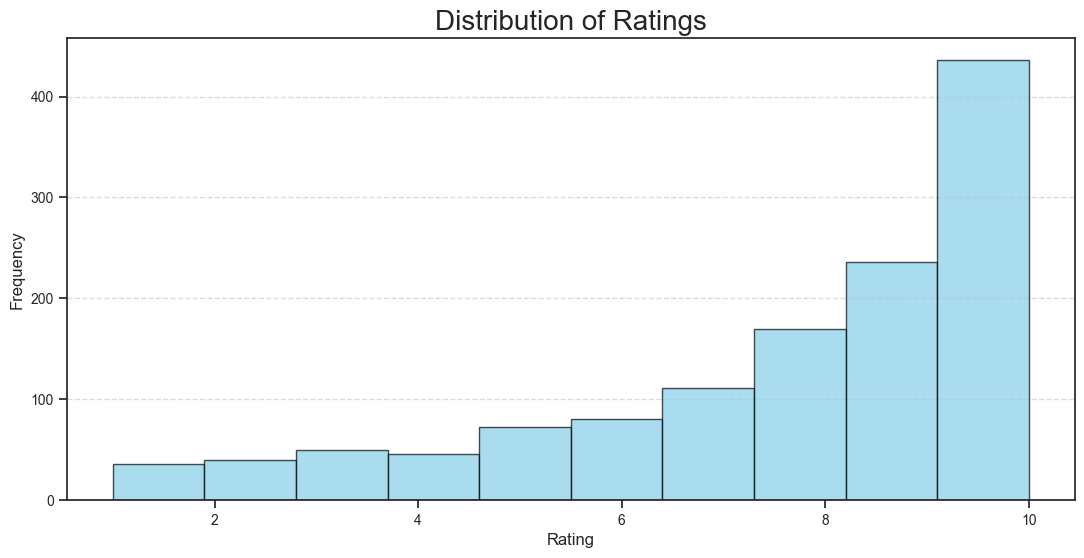

In [747]:
plt.figure(figsize=(13, 6))

plt.hist(df['Rating'], edgecolor='black', color='skyblue', alpha=0.7)

plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Ratings', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### **2. Show Distribution of Reviews** 

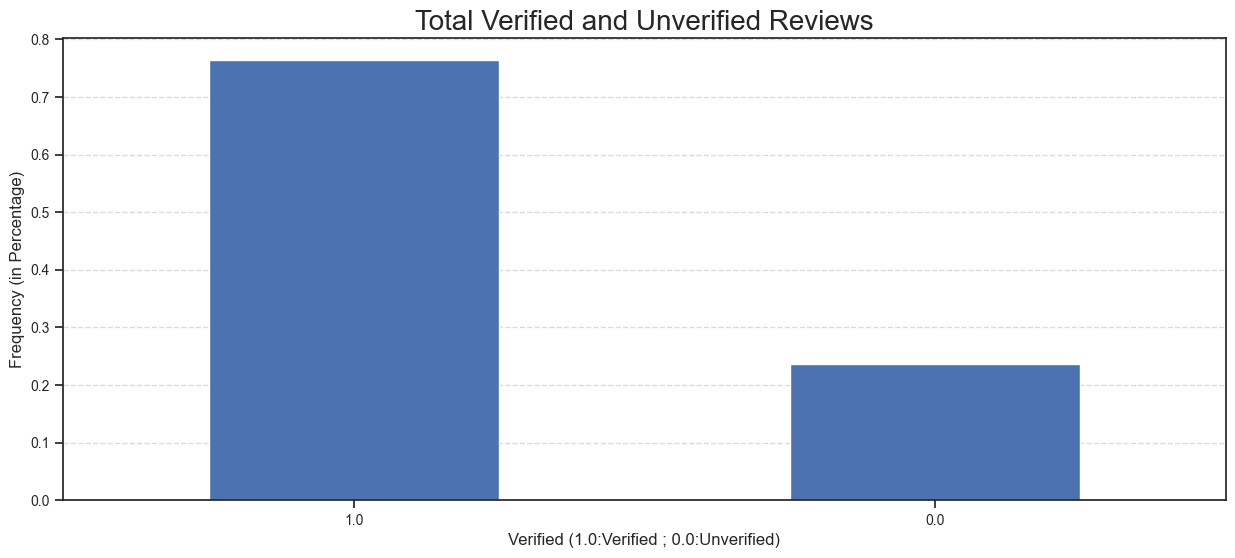

In [748]:
plt.figure(figsize=(15, 6))

plots = df['Verified'].value_counts(normalize=True).plot(kind='bar')

plt.xlabel('Verified (1.0:Verified ; 0.0:Unverified)', fontsize=12)
plt.ylabel('Frequency (in Percentage)', fontsize=12)
plt.title('Total Verified and Unverified Reviews', fontsize=20)
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### **3. Show Distribution of Countries** 

Distribution of Top 20 Countries

In [749]:
df['Country'].unique()

array(['Australia', 'Qatar', 'United Kingdom', 'United States', 'Germany',
       'Singapore', 'Lebanon', 'Iceland', 'Greece', 'Switzerland',
       'Belgium', 'Kuwait', 'United Arab Emirates', 'Italy', 'Sweden',
       'Denmark', 'France', 'Nepal', 'Thailand', 'Oman', 'Czech Republic',
       'Poland', 'New Zealand', 'India', 'Indonesia', 'Vietnam',
       'Netherlands', 'Romania', 'Philippines', 'Hong Kong', 'Bulgaria',
       'South Africa', 'Japan', 'Ireland', 'Algeria', 'Spain', 'Malaysia',
       'Kenya', 'Turkey', 'Norway', 'Canada', 'Brazil', 'Pakistan',
       'Iran', 'Brunei', 'China', 'Saudi Arabia', 'Slovenia', 'Portugal',
       'Croatia', 'South Korea', 'Sri Lanka', 'Dominican Republic',
       'Austria', 'Finland', 'Tunisia', 'Serbia', 'Bangladesh',
       'Russian Federation', 'Mozambique', 'Bosnia and Herzegovina',
       'Laos', 'Georgia', 'Trinidad & Tobago', 'Taiwan', 'Zambia',
       'Macau', 'Myanmar', 'Cyprus', 'Egypt', 'Zimbabwe', 'Panama',
       'Papua New Gui

In [750]:
# Number of Unique countries within data.
df['Country'].nunique()

81

Since There are total 81 countries, we'll take only top 20 countries for better understanding, on major customers belonging to which country.

In [751]:
# Top 20 countries by Travellers
df['Country'].value_counts().head(20)

United Kingdom          243
United States           133
Australia               123
Germany                  89
Qatar                    57
Thailand                 37
Sweden                   30
United Arab Emirates     30
Vietnam                  28
Switzerland              26
South Africa             25
Denmark                  25
Netherlands              24
Malaysia                 23
Singapore                23
India                    23
Hong Kong                22
Italy                    21
Canada                   19
Philippines              17
Name: Country, dtype: int64

`United Kingdom` is the country where we have highest number of customers from followed by United States and Australia.

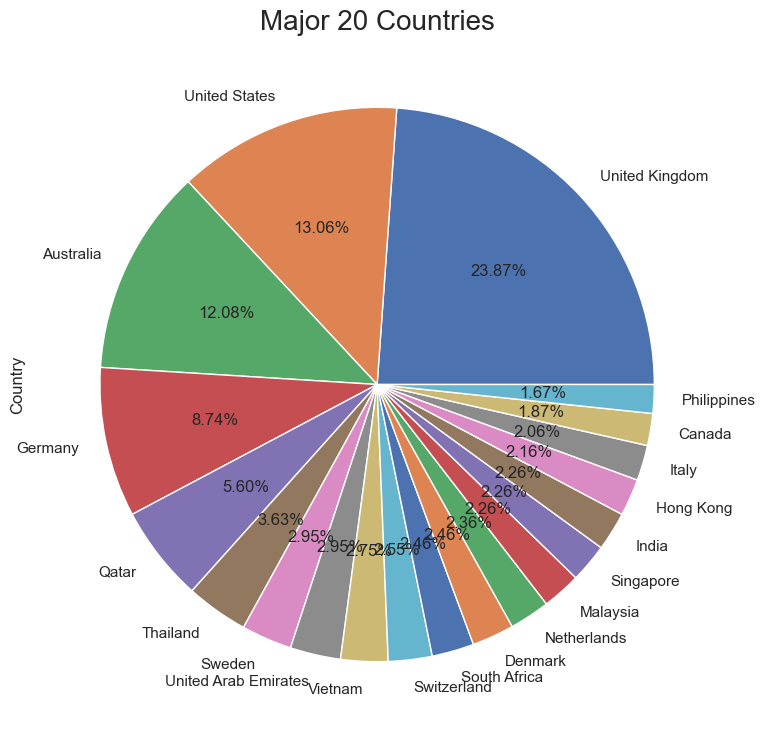

In [752]:
plt.figure(figsize=(14, 9))

plots = df['Country'].value_counts(normalize=True).head(20).plot(kind='pie', autopct="%.2f%%")

plt.title('Major 20 Countries', fontsize=20)
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### **4. Recommendation by Customers from Top 10 Countries** 

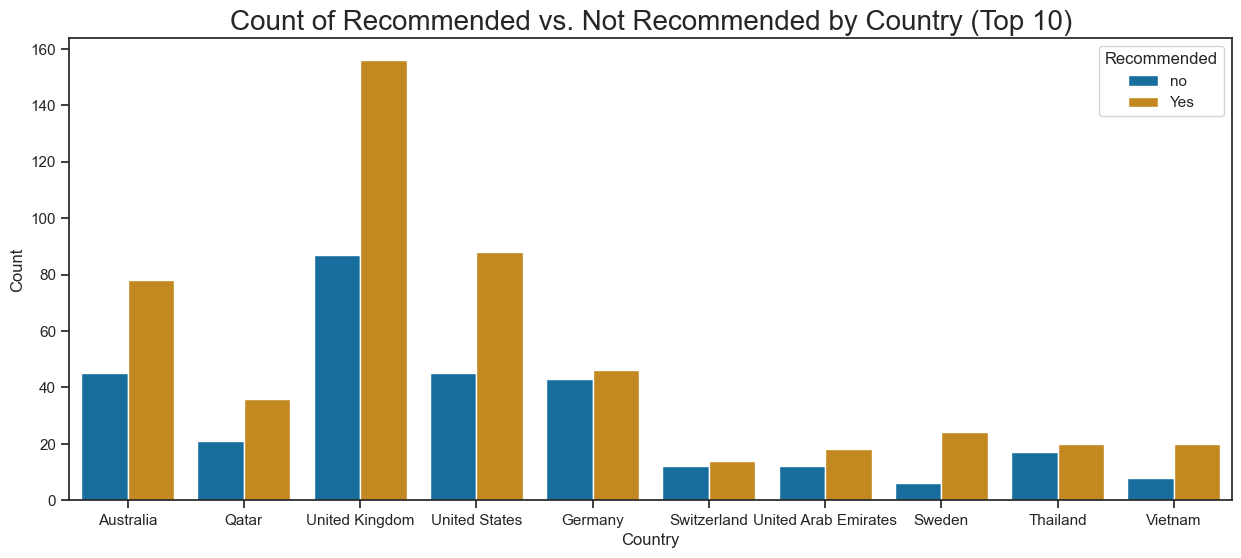

In [753]:
# Selecting the top 10 countries
top_10_countries = df['Country'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 countries
df_top_10_countries = df[df['Country'].isin(top_10_countries)]

plt.figure(figsize=(15, 6))
sns.countplot(x='Country', hue='Recommended', data=df_top_10_countries, palette='colorblind')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Count of Recommended vs. Not Recommended by Country (Top 10)', fontsize=20)
plt.xticks()
plt.legend(title='Recommended')
plt.show()


### **5. Distribution by Type of Travellers** 

#### **A. Bar Plot**

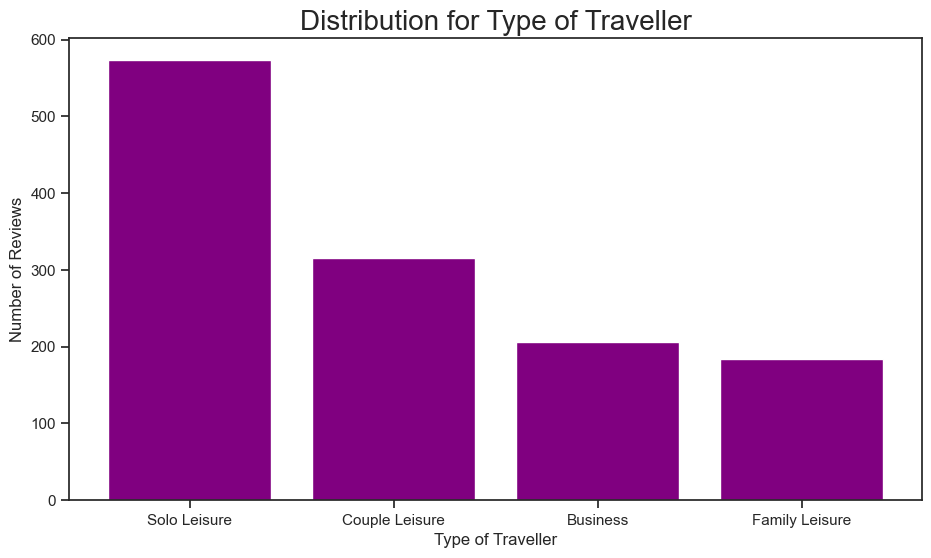

In [768]:
type_of_traveller_counts = df['Type Of Traveller'].value_counts()

plt.figure(figsize=(11, 6))
plt.bar(type_of_traveller_counts.index, type_of_traveller_counts.values, color='purple')
plt.xlabel('Type of Traveller')
plt.ylabel('Number of Travellers')
plt.title('Distribution for Type of Traveller', fontsize=20)
plt.xticks(rotation=0)
plt.show()

#### **B. RainCloud Plot**

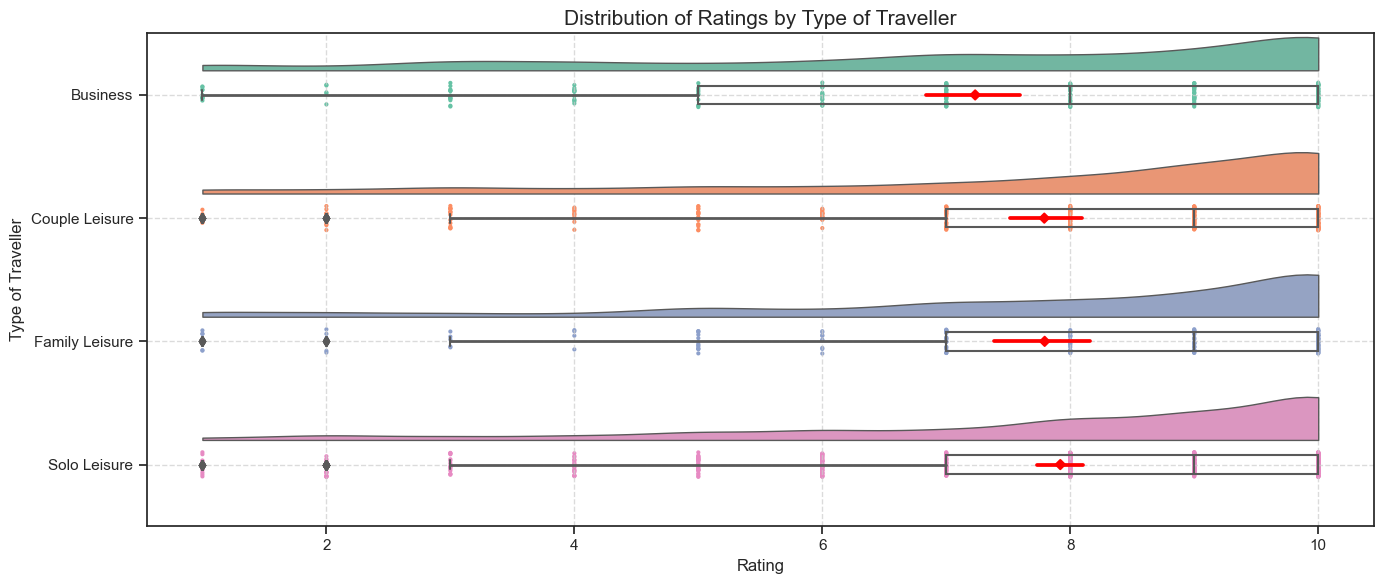

In [755]:
plt.figure(figsize=(14, 6))

RainCloud(x='Type Of Traveller', y='Rating', data=df, orient='h', alpha=1)

# Adding mean line
sns.pointplot(x='Rating', y='Type Of Traveller', data=df, join=False, color='red', markers='D', scale=0.7, legend=True)

plt.xlabel('Rating')
plt.ylabel('Type of Traveller')
plt.title('Distribution of Ratings by Type of Traveller', fontsize = 15)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


This above code generates a combined RainCloud and point plot to visualize the distribution of ratings across different types of travelers. The `plt.figure(figsize=(14, 7))` command sets the size of the figure to 14 inches in width and 7 inches in height. 

The `RainCloud()` function creates the RainCloud plot, a type of distributional plot that combines elements of box plots, violin plots, and scatter plots. It's used to display the distribution of ratings (`y='Rating'`) for each category of traveler (`x='Type Of Traveller'`). The `orient='h'` parameter sets the orientation of the plot to horizontal, and `alpha=1` adjusts the transparency of the RainClouds, setting it to maximum opacity.

Next, the `sns.pointplot()` function adds mean lines to the plot. Each point on these lines represents the average rating for a specific type of traveler. The `join=False` parameter ensures that points are not connected by lines. Points are colored red (`color='red'`) and shaped like diamonds (`markers='D'`). Additionally, the scale of the markers is adjusted to 70% of their default size (`scale=0.7`), and a legend is displayed (`legend=True`) to explain the meaning of the marker shapes.

Following the plot generation, axis labels (`plt.xlabel()` and `plt.ylabel()`), a title (`plt.title()`), and a grid (`plt.grid()`) are added for better interpretation. Finally, `plt.tight_layout()` adjusts the spacing between plot elements to optimize readability, and `plt.show()` displays the plot. Overall, this code provides a comprehensive visualization of ratings by type of traveler, highlighting both the distribution of individual ratings and the average rating for each category of traveler.

1. **Rainclouds (Density Curves with Individual Data Points):**
   - The rainclouds represent the distribution of ratings for each type of traveler. They combine elements of kernel density estimation (KDE) plots and individual data points.
   - The cloudy area of each raincloud represents the KDE, showing the probability density of ratings. This cloudy region is darker where there are more data points, indicating higher density of ratings.
   - The vertical lines extending from the cloudy region represent individual data points, showing where each rating falls on the scale.

2. **Mean Rating Markers:**
   - The red diamond markers overlaid on the plot represent the mean rating for each type of traveler.
   - These markers provide a central tendency measure, indicating the average rating within each group.

3. **Insights and Interpretation:**
   - By examining the rainclouds and mean rating markers, one can gain insights into how ratings are distributed among different types of travelers.
   - Variations in the shape, spread, and position of the rainclouds indicate differences in rating distributions between traveler types.
   - Comparing the mean rating markers allows for a quick assessment of the average satisfaction level across various groups.

Overall, this visualization offers a comprehensive view of the distribution of ratings among different types of travelers, along with a clear representation of the average rating within each group. It helps in identifying patterns, trends, and differences in traveler satisfaction levels, facilitating deeper insights into customer experiences.

### **6. Rating Distribution by Seat Type** 

In [756]:
df['Seat Type'].value_counts()

Economy Class      664
Business Class     586
First Class         24
Premium Economy      4
Name: Seat Type, dtype: int64

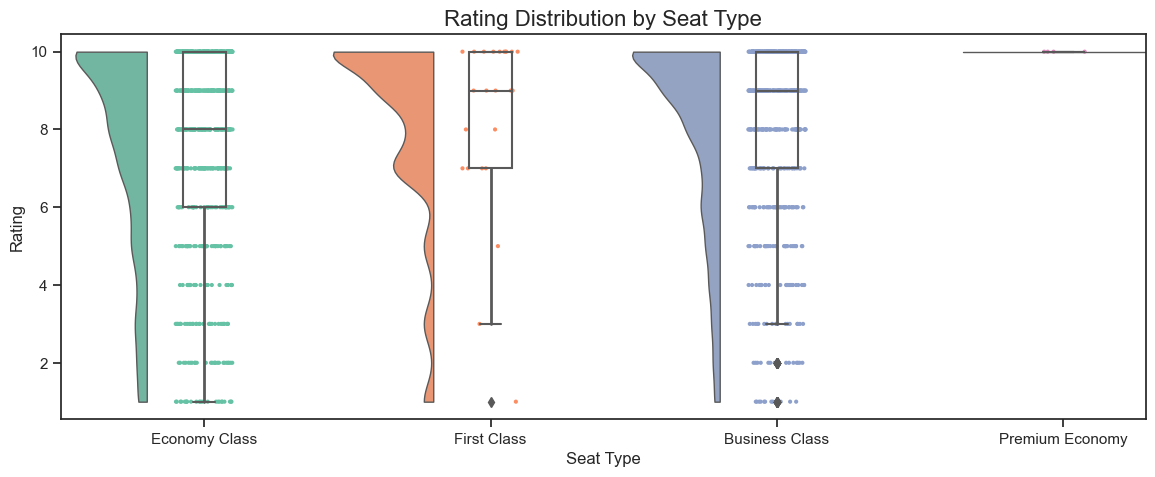

In [757]:
plt.figure(figsize=(14, 5))
sns.set_theme(style='ticks') 

RainCloud(x='Seat Type', y='Rating', data=df, orient='v')

plt.xlabel('Seat Type')
plt.ylabel('Rating')
plt.title('Rating Distribution by Seat Type', fontsize = 16)
plt.xticks()
plt.show()


### **7. Recommended vs. Not Recommended** 

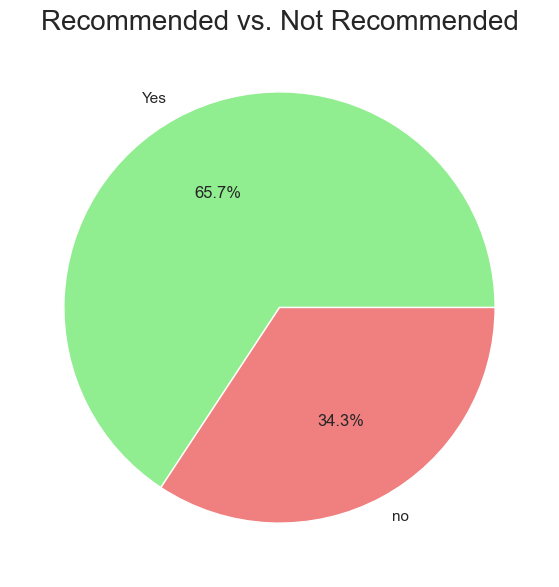

In [758]:
recommend_counts = df['Recommended'].value_counts()

plt.figure(figsize=(10,7))
plt.pie(recommend_counts, labels=recommend_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Recommended vs. Not Recommended', fontsize=20)
plt.show()

### **8. Top 5 Repeating Customers by Country Flying with Qatar Airways**

In [759]:
df[['Country', 'Author']].value_counts().head(6)

Country        Author          
Vietnam        Anders Pedersen     26
Germany        Michael Schade      23
Qatar          Alwaleed Althani    22
Denmark        Anders Pedersen     12
Iceland        Rajan Parrikar       9
United States  R Sanyal             8
dtype: int64

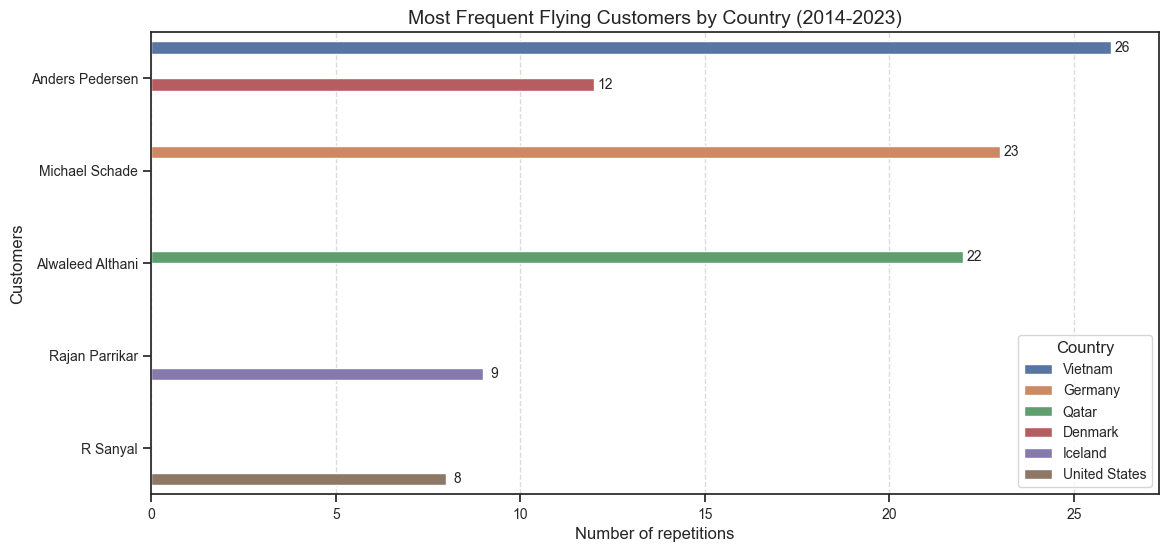

In [760]:
plt.figure(figsize=(13, 6))

# Grouping and plotting
top_customers = df.groupby(['Author', 'Country']).size().reset_index(name='Count').nlargest(6, 'Count')

bars = sns.barplot(x='Count', y='Author', hue='Country', dodge=True, data=top_customers)

plt.xlabel('Number of repetitions', fontsize=12)
plt.ylabel('Customers', fontsize=12)
plt.title('Most Frequent Flying Customers by Country (2014-2023)', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(title='Country', fontsize=10, loc='lower right')

# Add value annotations to the bars
for bar in bars.patches:
    width = bar.get_width()
    if width > 0:  # Check if width is finite
        plt.text(width + 0.3, bar.get_y() + bar.get_height()/2, '{:.0f}'.format(width), ha='center', va='center', fontsize=10)

plt.show()

### **9. Top 5 Customers by Type of Travelling through Qatar Airways**

In [761]:
df.groupby(['Author', 'Type Of Traveller']).size().reset_index(name='Count').nlargest(10, 'Count')

,Author,Type Of Traveller,Count
609,Michael Schade,Solo Leisure,22
63,Anders Pedersen,Business,19
65,Anders Pedersen,Solo Leisure,16
60,Alwaleed Althani,Solo Leisure,11
59,Alwaleed Althani,Family Leisure,8
771,R Sanyal,Solo Leisure,8
788,Rajan Parrikar,Couple Leisure,7
607,Michael Schade,Business,6
1015,W Simpson,Couple Leisure,6
226,David Taylor,Business,5


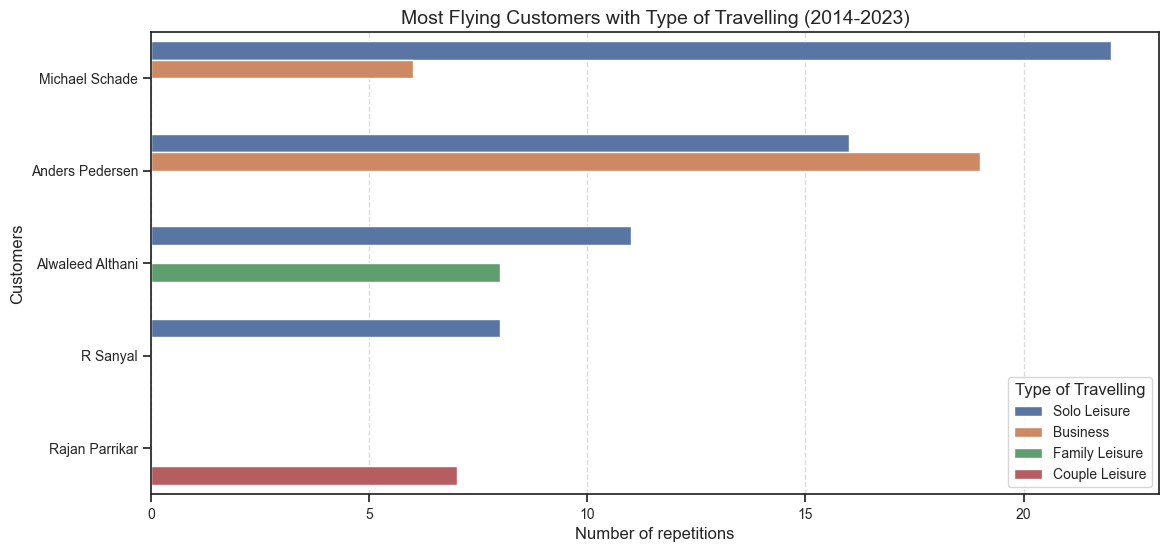

In [762]:
plt.figure(figsize=(13, 6))

# Grouping and plotting
top_customers = df.groupby(['Author', 'Type Of Traveller']).size().reset_index(name='Count').nlargest(8, 'Count')

bars = sns.barplot(x='Count', y='Author', hue='Type Of Traveller', dodge=True, data=top_customers)

plt.xlabel('Number of repetitions', fontsize=12)
plt.ylabel('Customers', fontsize=12)
plt.title('Most Flying Customers with Type of Travelling (2014-2023)', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(title='Type of Travelling', fontsize=10, loc='lower right')
plt.show()

### **10. Month-Year-level Analysis on number of Travellers**

Changing `Date Flown` Column to two seperate columns named `Month Flown` & `Year Flown` for further easy analysis. 

In [763]:
# Converting Date Flown to DateTime format
df['Date Flown'] = pd.to_datetime(df['Date Flown'])

# Extracting month and year into separate columns
df['Month Flown'] = df['Date Flown'].dt.strftime('%B')
df['Year Flown'] = df['Date Flown'].dt.year

In [764]:
# Dropping Original `Date Flown` column as it became redundant in table.
df.drop('Date Flown', axis = 1, inplace = True)

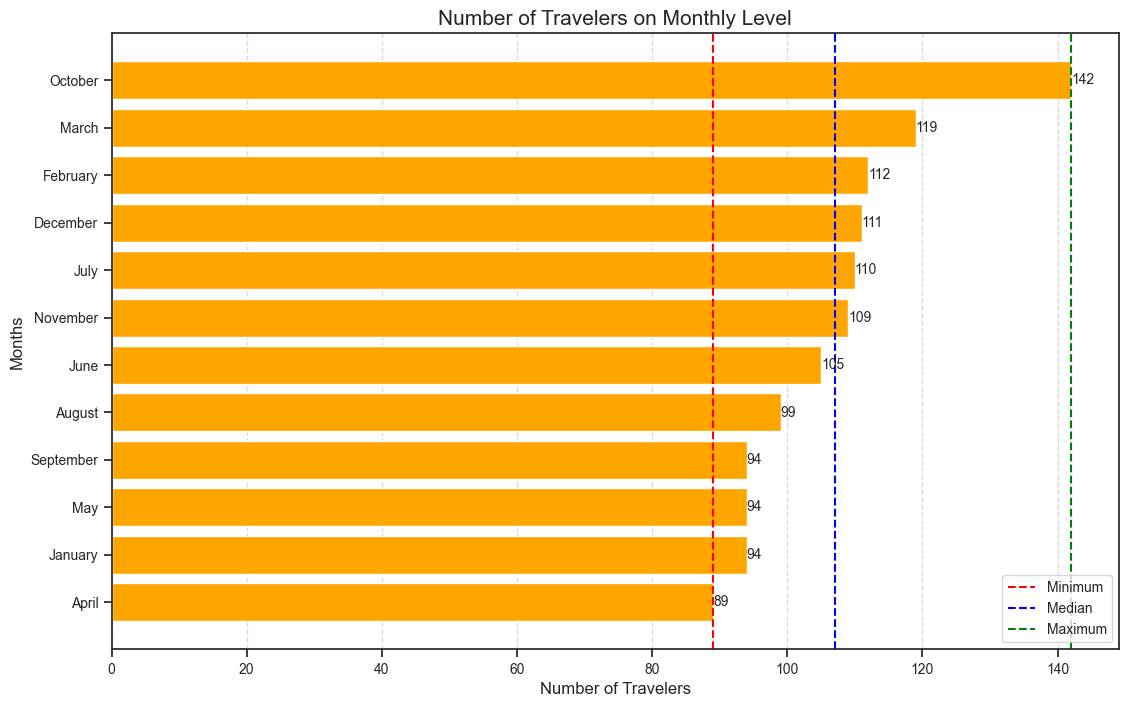

In [765]:
plt.figure(figsize=(13, 8))

# Grouping and plotting
monthly_travelers = df.groupby('Month Flown')['Author'].count().sort_values(ascending=True)

bars = plt.barh(monthly_travelers.index, monthly_travelers.values, color='orange')

# Adding count annotations
for bar, value in zip(bars, monthly_travelers.values):
    plt.text(value, bar.get_y() + bar.get_height()/2, str(value), ha='left', va='center', fontsize=10)


plt.xlabel('Number of Travelers', fontsize=12)
plt.ylabel('Months', fontsize=12)
plt.title('Number of Travelers on Monthly Level', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7) 
plt.axvline(x=monthly_travelers.min(), color='red', linestyle='--', label='Minimum')     # Adding Minimum line
plt.axvline(x=monthly_travelers.median(), color='blue', linestyle='--', label='Median')  # Adding Median line
plt.axvline(x=monthly_travelers.max(), color='green', linestyle='--', label='Maximum')   # Adding Max line
plt.legend(fontsize=10, loc = 'lower right')
plt.show()


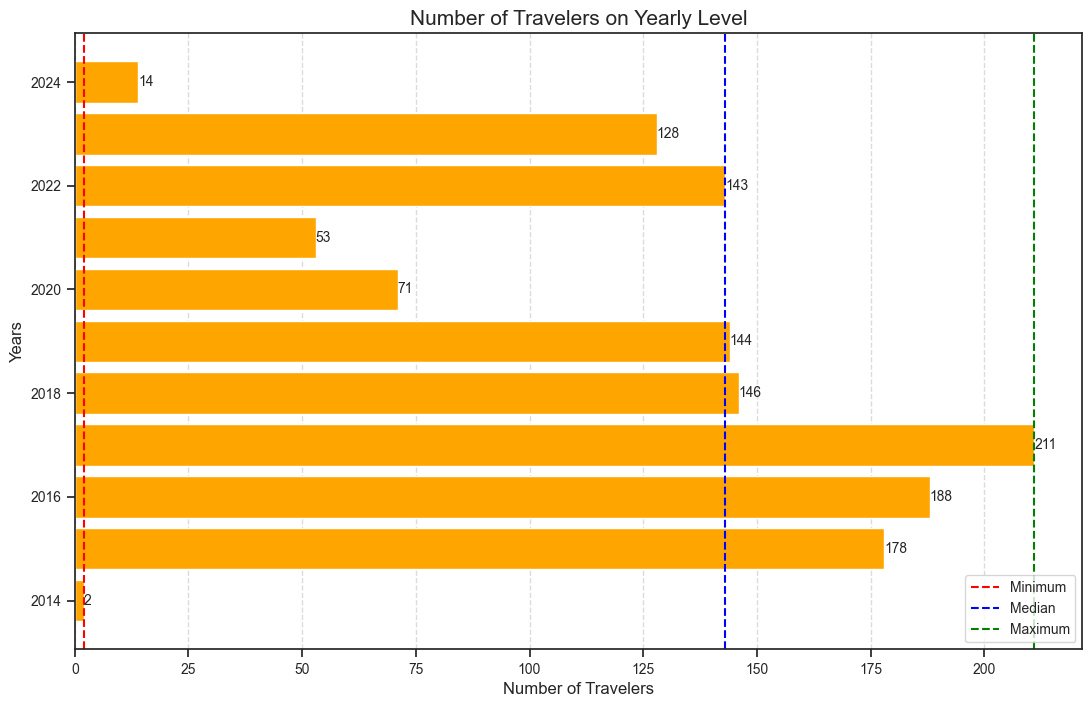

In [766]:
plt.figure(figsize=(13, 8))

# Grouping and plotting
yearly_travelers = df.groupby('Year Flown')['Author'].count().sort_values(ascending=True)

bars = plt.barh(yearly_travelers.index, yearly_travelers.values, color='orange')

for bar, value in zip(bars, yearly_travelers.values):
    plt.text(value, bar.get_y() + bar.get_height()/2, str(value), ha='left', va='center', fontsize=10)


plt.xlabel('Number of Travelers', fontsize=12)
plt.ylabel('Years', fontsize=12)
plt.title('Number of Travelers on Yearly Level', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Adding gridlines
plt.axvline(x=yearly_travelers.min(), color='red', linestyle='--', label='Minimum')
plt.axvline(x=yearly_travelers.median(), color='blue', linestyle='--', label='Median')
plt.axvline(x=yearly_travelers.max(), color='green', linestyle='--', label='Maximum')  # Adding average line
plt.legend(fontsize=10, loc = 'lower right')
plt.show()


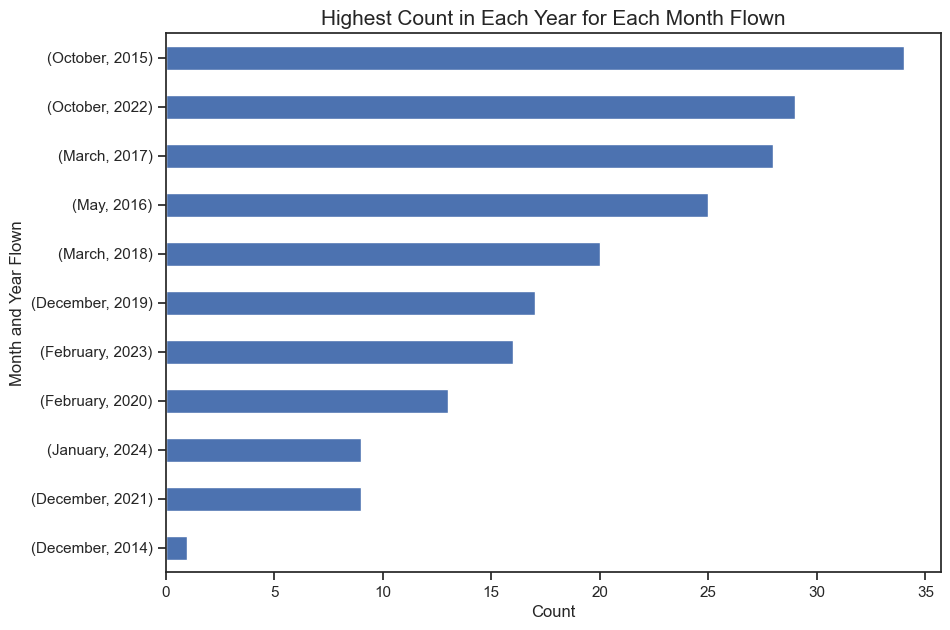

In [767]:
monthly_counts = df.groupby(['Month Flown', 'Year Flown'])['Author'].count()

# Finding the index corresponding to the maximum count for each year
max_counts_idx = monthly_counts.groupby('Year Flown').idxmax()

# Filtering the DataFrame based on these indices
max_counts = monthly_counts.loc[max_counts_idx]

# Plotting the results
max_counts.sort_values(ascending=True).plot(kind='barh', figsize=(10, 7))
plt.xlabel('Count')
plt.ylabel('Month and Year Flown')
plt.title('Highest Count in Each Year for Each Month Flown', fontsize=15)
plt.show()


### **11. Top Locations Travelled by Travellers**

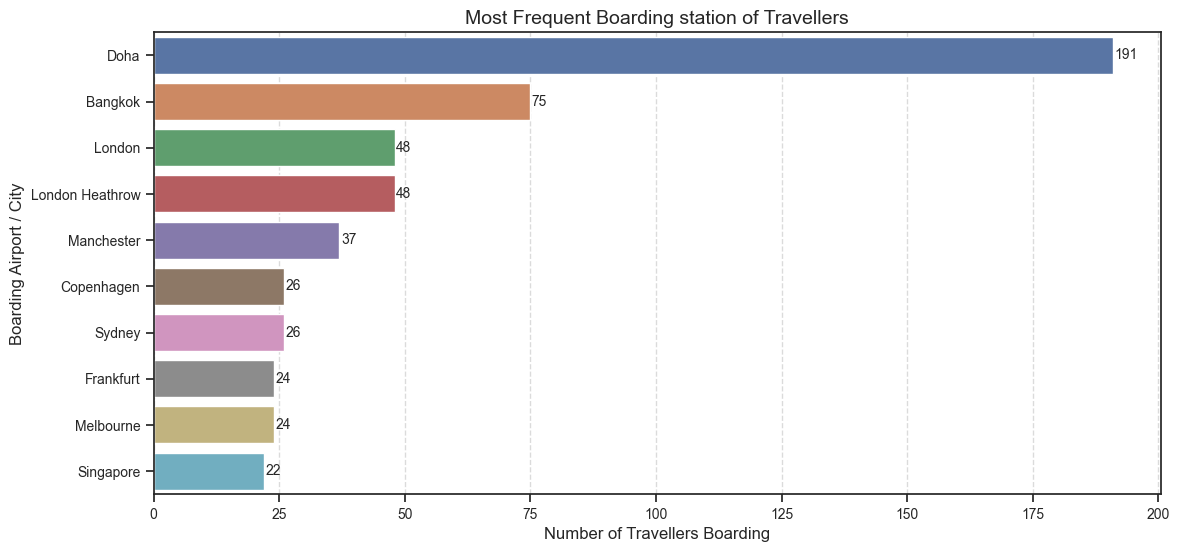

In [799]:
plt.figure(figsize=(13, 6))

# Grouping and plotting
top_customers = df.groupby('From').size().reset_index(name='Count').nlargest(10, 'Count')

bars = sns.barplot(x='Count', y='From', dodge=True, data=top_customers)

plt.xlabel('Number of Travellers Boarding', fontsize=12)
plt.ylabel('Boarding Airport / City', fontsize=12)
plt.title('Most Frequent Boarding station of Travellers', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add value annotations to the bars
for bar in bars.patches:
    width = bar.get_width()
    if width > 0:  # Check if width is finite
        plt.text(width + 0.3, bar.get_y() + bar.get_height()/2, '{:.0f}'.format(width), ha='left', va='center', fontsize=10)

plt.show()

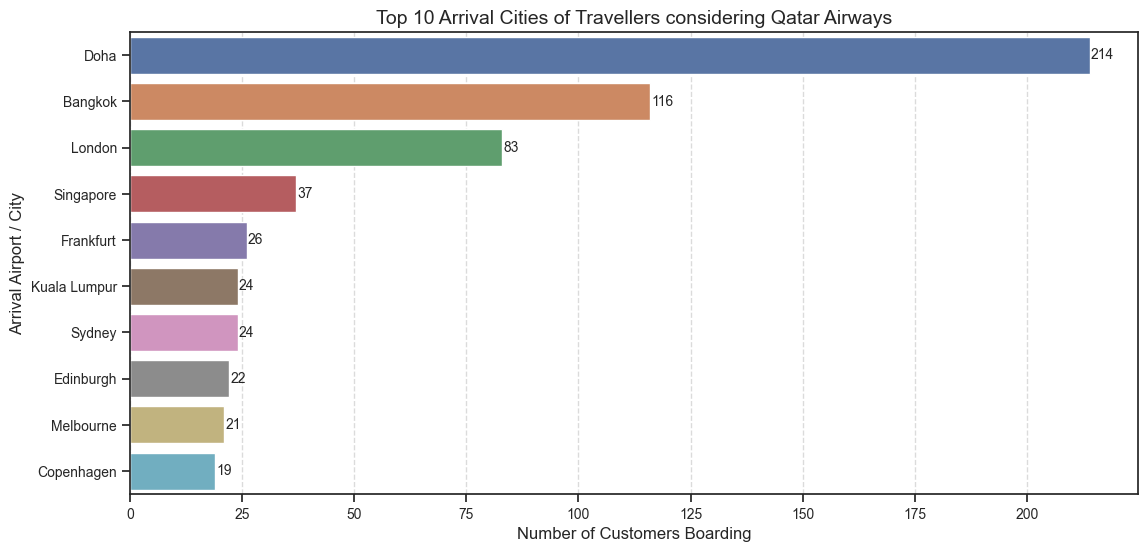

In [800]:
plt.figure(figsize=(13, 6))

# Grouping and plotting
top_customers = df.groupby('To').size().reset_index(name='Count').nlargest(10, 'Count')

bars = sns.barplot(x='Count', y='To', dodge=True, data=top_customers)

plt.xlabel('Number of Customers Boarding', fontsize=12)
plt.ylabel('Arrival Airport / City', fontsize=12)
plt.title('Top 10 Arrival Cities of Travellers considering Qatar Airways', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add value annotations to the bars
for bar in bars.patches:
    width = bar.get_width()
    if width > 0:  # Check if width is finite
        plt.text(width + 0.3, bar.get_y() + bar.get_height()/2, '{:.0f}'.format(width), ha='left', va='center', fontsize=10)

plt.show()

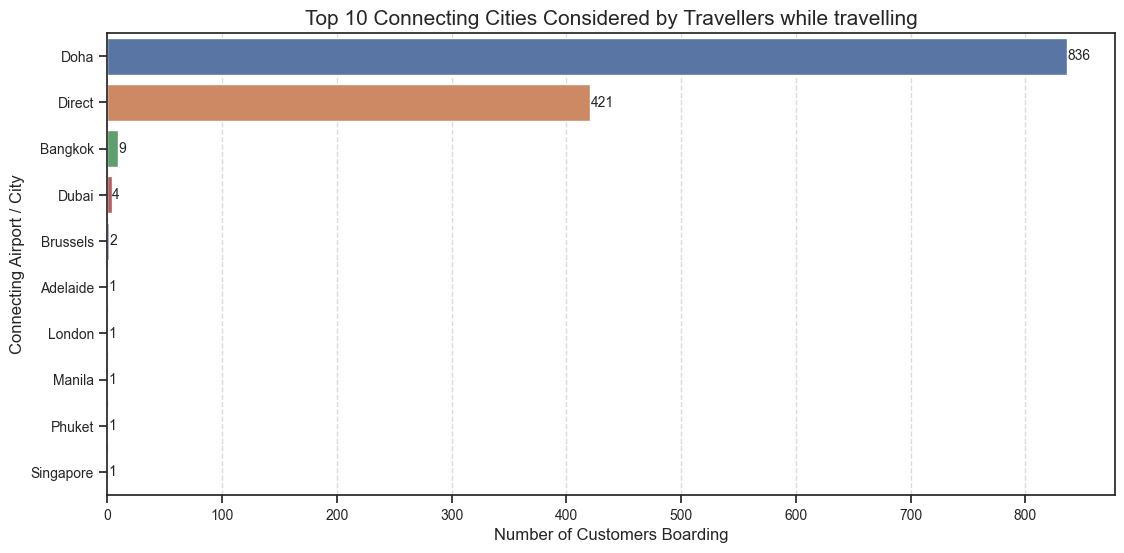

In [788]:
plt.figure(figsize=(13, 6))

# Grouping and plotting
top_customers = df.groupby('Via').size().reset_index(name='Count').nlargest(10, 'Count')

bars = sns.barplot(x='Count', y='Via', dodge=True, data=top_customers)

plt.xlabel('Number of Customers Boarding', fontsize=12)
plt.ylabel('Connecting Airport / City', fontsize=12)
plt.title('Top 10 Connecting Cities Considered by Travellers while travelling', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add value annotations to the bars
for bar in bars.patches:
    width = bar.get_width()
    if width > 0:  # Check if width is finite
        plt.text(width + 0.3, bar.get_y() + bar.get_height()/2, '{:.0f}'.format(width), ha='left', va='center', fontsize=10)

plt.show()